# The Assignment: Estimation of obesity levels based on eating habits and physical condition

The goal of this assignment is to apply the different machine learning algorithms on a real-life biological datasets.
This is done by using the dataset Obesity data levels data.

* Part 1: choosing the dataset
* Part 2: describing the dataset
* Part 3: exploring and pre-processing
* Part 4: regression
* Part 5: classification
* Part 6: clustering
* Part 7: conclusion

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                                  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score, roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB     
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier

## Part 1: choosing the dataset

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Data retrieved from the link https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

In [32]:
# Read in the data from the common folder
data=pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")

## Part 2: Describing the dataset

In [33]:
# Show the data for the first 10 lines
display(data.head(10))

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [34]:
# Showing the dimensions of the dataset. 
print("Rows & Columns: ",data.shape)
# Summarize the dataframe: viewing the statistics per column of the dataset 
data.describe()

Rows & Columns:  (2111, 17)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [35]:
print("The different columns of the dataset: \n",data.columns)

The different columns of the dataset: 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [36]:
print(f"The datatypes of each column:\n{data.dtypes}")

The datatypes of each column:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


### Column names & explanation
* Gender: The gender Male or Female. 
* Age: This column contains the ages between 14 and 61 years old. 
* Height: Contains the height of a person. 
* Weight: How much a erson weights based on Obese or not. 
* family_history_with_overweight: If there is a history known in the family of being Obese. 
* FAVC: The frequent consumption of high caloric food. 
* FCVC: The frequency of consuming vegetables. 
* NCP:Number of main meals. 
* CAEC: The consumption of food between meals. 
* SMOKE: Do they smoke. 
* CH2O: Consumption of water daily. 
* SCC: Calories consumption monitoring. 
* FAF: Physical activity frequency. 
* TUE: Time using technology devices. 
* CALC: How often drinking alcohol.
* MTRANS:The transportation used. 
* NObeyesdad: The number of obesity and if it is presence. 

In [37]:
# Display the na values per column in the dataset.
print("Checking if there are any columns with NA values.\n")
print("Columns containg empty values:\n",np.sum(data.isna(), axis=0))

Checking if there are any columns with NA values.

Columns containg empty values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [38]:
print("Checking on some columns what unique values are given.")
print("Family history overweight: ",data.family_history_with_overweight.unique())
print("FAVC: ",data.FAVC.unique())
print("CAEC: ",data.CAEC.unique())
print("SMOKE: ",data.SMOKE.unique())
print("SCC: ",data.SCC.unique())
print("CALC: ",data.CALC.unique())
print("MTRANS: ",data.MTRANS.unique())
print("NObeyesdad: ",data.NObeyesdad.unique())
print("Gender: ",data.Gender.unique())

Checking on some columns what unique values are given.
Family history overweight:  ['yes' 'no']
FAVC:  ['no' 'yes']
CAEC:  ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE:  ['no' 'yes']
SCC:  ['no' 'yes']
CALC:  ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS:  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad:  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Gender:  ['Female' 'Male']


Replacing the categorical columns to numerical categories except for the target Column NObeysdad and the column Gender.

In [39]:
data.Gender.replace({'Female': 0, 'Male': 1}, inplace = True)
data.family_history_with_overweight.replace({'no': 0, 'yes': 1}, inplace = True)
data.FAVC.replace({'no': 0, 'yes': 1}, inplace = True)
data.CAEC.replace({'no': 0, 'Sometimes': 1, 'Frequently':2, 'Always':3}, inplace = True)
data.SMOKE.replace({'no': 0, 'yes': 1}, inplace = True)
data.SCC.replace({'no': 0, 'yes': 1}, inplace = True)
data.CALC.replace({'no': 0, 'Sometimes': 1, 'Frequently':2, 'Always':3}, inplace = True)
data.MTRANS.replace({'Walking': 0, 'Bike': 1, 'Motorbike':2, 'Public_Transportation':3,
                    'Automobile':4}, inplace = True)

In [40]:
display(data.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,Overweight_Level_II


Using the Z-score to extract if there are any outliers present in the dataset

In [41]:
# Use the following function to determine the zscore for each value
from scipy.stats import zscore
# Remove the outliers
data_no_outliers = data[(zscore(data[['Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']])<=1.5)]
# It is not performed on the Age & Smoke column otherwise there are some errors. It returns NaN's
# Take a look at the new shape of the dataframe
data_no_outliers.shape

(2111, 17)

In [42]:
# Only dropping columns that have all NA values
data_no_outliers.dropna(axis=1, how='all', inplace=True)
# Adding unused columns to have a complete dataset again.
data_no_outliers = data_no_outliers.join(data[['Age','SMOKE','Gender','NObeyesdad']])

In [43]:
# Showing the processed dataset.
display(data_no_outliers.head())
data_no_outliers.shape

,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Age,SMOKE,Gender,NObeyesdad
0,1.62,64.0,1,0,2.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,3,21.0,0,0,Normal_Weight
1,1.52,56.0,1,0,3.0,3.0,1.0,NaN,NaN,NaN,0.0,1.0,3,21.0,1,0,Normal_Weight
2,1.80,77.0,1,0,2.0,3.0,1.0,2.0,0.0,2.0,1.0,NaN,3,23.0,0,1,Normal_Weight
3,1.80,87.0,0,0,3.0,3.0,1.0,2.0,0.0,2.0,0.0,NaN,0,27.0,0,1,Overweight_Level_I
4,1.78,89.8,0,0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,3,22.0,0,1,Overweight_Level_II


(2111, 17)

The columns containing numerical data (including transformed to numerical data columns) do not have any outliers the records stay the same. The original dataset willl be used further. 

## Part 3: exploring and pre-processing


Use visualization techniques to gain information on which attributes may be correlated to predict the target(s). Describe the executed pre-processing steps and substantiate why you performed the steps.

### Countplot
The target column is the column "NObeyesdad" indicating the type of obesity or not present. Can check the distribution of the target column

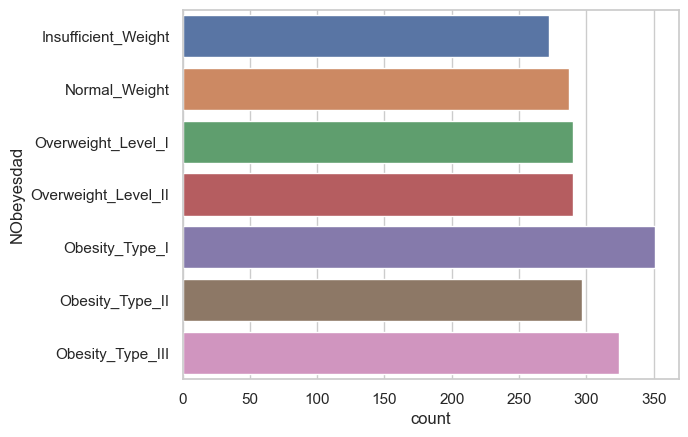

In [44]:
sns.set_theme(style="whitegrid")
sns.countplot(data=data, y='NObeyesdad', order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
                                                'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II',
                                                'Obesity_Type_III']);

The distribution of the categorys iq relatively evenly spread. The lowest category containing aorund 275 records is the "Insufficient Weight" attribute. The highest is "Obesity Type 1" 350 records. All the other attributes vary in between. 

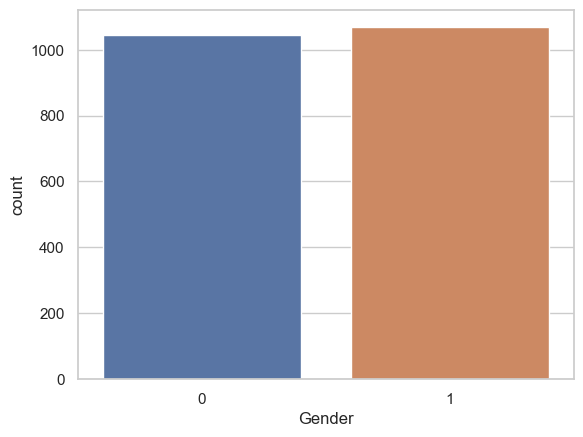

In [45]:
# Checking the distribution of the Gender columns. 
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Gender');

The distribution between the gender columns is relatively evenly spread having both above the 1000 attributes, The set contains 2111 attributes. 0 is Female & 1 is for Male;

### Pairplot
Creating a pairplot gives a great overview of the variables and the correlation between them. 

In [ ]:
sns.pairplot(data)

The plot shows there are a lot of clusters formed. The possible lineair correlation is between Age, Height & Weight. The other plots show more of cluster formings 

### Scatter plots
By creating scatter plots of the numerical data it is possible to find any corelation between different variables

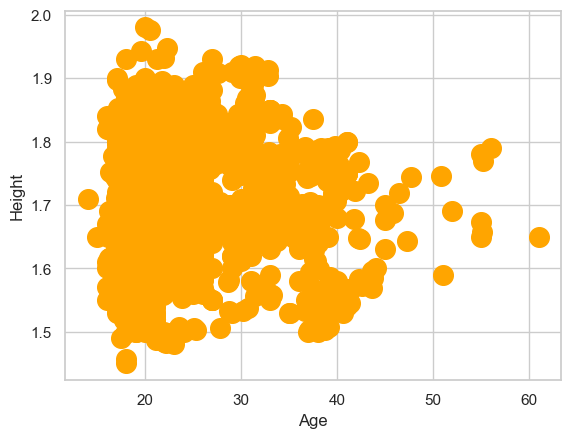

In [46]:
data.plot(x="Age",y="Height",kind="scatter",grid=True,s=200,color='orange');

This does not provide any valuable data. It just shows at the Age of 20 there is a lot of varioation in hieght and when getting older the Height start to somewhat decrease as increase. This could be beecause of Aging and having osteoporosis on your back or any other factors. 

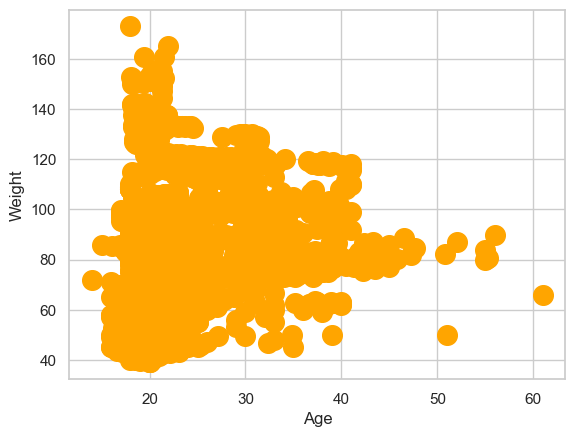

In [47]:
data.plot(x="Age",y="Weight",kind="scatter",grid=True,s=200,color='orange');

When plotting the Age against the weight there is a down and uptrend noticeable. When getting older the weight starts to increase, but it also shows in some cases when getting older the weight starts to drop as well.

<Axes: xlabel='Weight', ylabel='Height'>

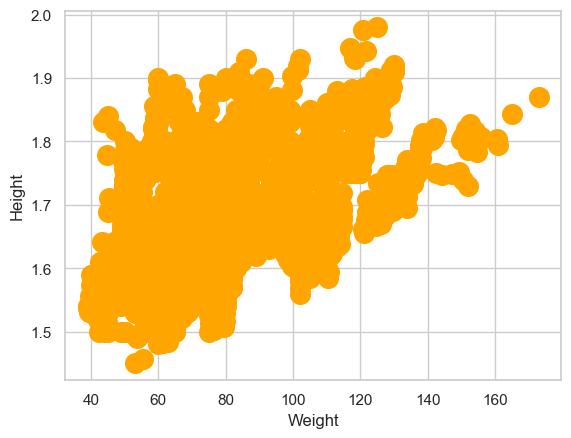

In [48]:
data.plot(kind='scatter', x='Weight', y='Height', grid=True, s=200, color='orange')


When plotting the height against the weight. It shows that when the height of an person increases the weight does as well showing a decent correlation between Height & Weight. 

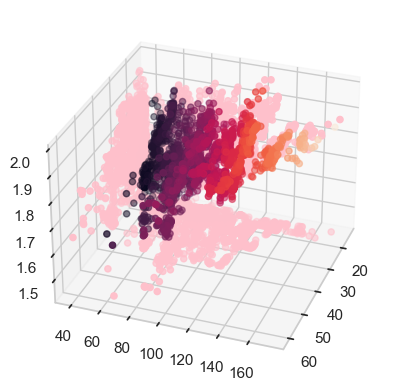

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.Age,data.Weight,data.Height,c=data.Weight)
# Project the points on the walls
ax.scatter3D(data.Age.min(),data.Weight,data.Height,c='pink')
ax.scatter3D(data.Age,data.Weight.min(),data.Height,c='pink')
ax.scatter3D(data.Age,data.Weight,data.Height.min(),c='pink')
ax.view_init(30, 20)

Plotting the 3 variables against each other to get a 3D visualization. 

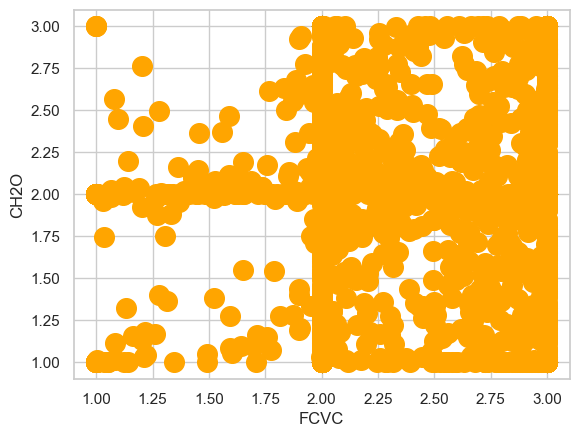

In [50]:
data.plot(x="FCVC",y="CH2O",kind="scatter",grid=True,s=200,color='orange');

Using any of the continous variables shows the representation of groups/clusters formed in the groups.

This is the same as the example above, groups are formed of the variables used. 

## Transforming Target Column

In [51]:
# Have to make sure the order is correct to have a good model to perform. 
data.NObeyesdad.replace({'Insufficient_Weight':0 ,'Normal_Weight': 1, 'Overweight_Level_I': 2, 
                            'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5,
                            'Obesity_Type_III':6}, inplace=True)
# Copy the dataset after transforming 
dataset=data.copy()

## Part 4: regression

After exploring the dataset can start using regressiont techniques on the dataset. 

### Linear Regression on Weight & Height

Using the three numerical columns 'Weight' & 'Height', will be used to perform a basic linear regression technique to predict 'Weight' of a person in Kg using the 'Height' in m

Normal shape:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Reshaped:
[[1.62    ]
 [1.52    ]
 [1.8     ]
 ...
 [1.752206]
 [1.73945 ]
 [1.738836]]

Slope: [[130.0048335]]
Intercept: [-134.64022287]


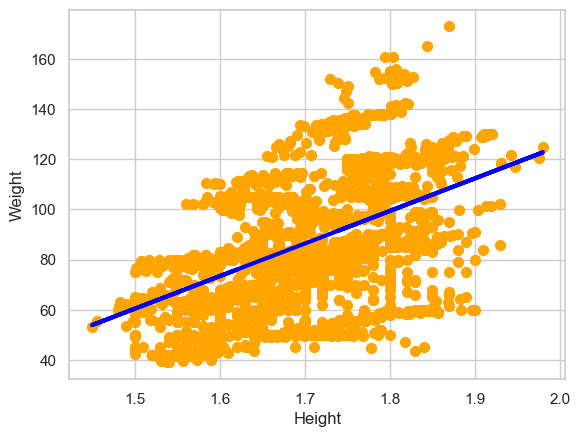

In [52]:
X = dataset.Height.values
y = dataset.Weight.values

# Now data is in 1 row ([1,2,3,4]) but needed in a colum => reshape aka seperate lists
# Here it is expected a 2D matrix. 
print(f"Normal shape:\n{X}")
X_reshaped = X.reshape(-1,1)
print(f"Reshaped:\n{X_reshaped}")
y_reshaped = y.reshape(-1,1)

# Construct a linear model from sklearn 
lregg=LinearRegression()

# Fit our data to the model
lregg.fit(X_reshaped,y_reshaped)

# Plot the data points
data.plot(kind='scatter',x='Height',y='Weight',s=50,grid=True,color='orange')

# Plot the constructed line from the regression model
plt.plot(X_reshaped,lregg.predict(X_reshaped), color='blue',linewidth=3)

# Print the slope and intercept
print()
print(f"Slope: {lregg.coef_}")
print(f"Intercept: {lregg.intercept_}")

In [53]:
# Predict the Weight of a person that's 1.7m
lregg.predict([[1.7]])

array([[86.36799408]])

Using the linear regression, having a height of 1.7m will predict into having a weight of 86.37 Kg. The weight is predicted based on the interceptinn on the linear line where the height is 1.7 m represents then the weight of 86.37 Kg.

Using the visualization there is some correlation when the height increases the weight does. 

Using the linear regression technique to predict weight it may not be that accurate on this dataset. On the Height of 1.7 m there is a variation of someone that could weigh between 45 Kg up till 130 Kg which is a very big diffrence.

The rest of the data will pe tested using the target column.

### Linear Regression 
Simple linear regression is used to estimate the relationship between two quantitative variables. This is to know how the relationship is between 2 variables. Using the target column to predict on and the other columns as features to use to predict the outcome. 

In [54]:
dataset=data.copy()

In [55]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


The targets are the type of Obesity which will be used as Y-axis. The features are the other columns that define wheter a person can belong depinding on categorical & numerical values to a certain obeisty class. 

In [56]:
# Split the data into features and targets using the NObeyesdad column
features = dataset.drop("NObeyesdad",axis=1)
targets = dataset["NObeyesdad"]

The training data should only be used to train the model
The testing data, should only be used to validate a model’s performance after training. This will help prevent overfitting
Use about 33% of the data as test set and use the random state 42 to alwasy have the exact split. 

In [57]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

Create an empty model linear regression model and fit the data on the model, using the train set. Do not have to transform the data since it did not change tehe input of data. 

In [58]:
lregmodel=LinearRegression()
# Never fit on the test model 
lregmodel.fit(X_train,y_train)

LinearRegression()

In [59]:
# See if there is any overfitting. Training higher -- > Overfitting. 
# Test never seen thus want a higher score. 
print("The Linear regression score of train model: ",lregmodel.score(X_train, y_train))
print("The Linear regression score of test model: ",lregmodel.score(X_test, y_test))

The Linear regression score of train model:  0.9495110047187945
The Linear regression score of test model:  0.9518197059355511


The training set here is lower then the test set, which has not seen the data beforehand. Test scoring higher is a good score since the test data has not seen the training model. There is no overfitting as underfitting of the model. 

In [60]:
# Resulting coefficients and intercept of the lineair regression technique.
print(f"Coefficients of the Feature columns: {(coef := lregmodel.coef_)}") 
# The intercept (Y-value) (sometimes called the “constant”) in a regression model represents the mean value 
# of the response variable when all of the predictor variables (X-values) in the model are equal to zero.
print(f"Intercept: {(intercept := lregmodel.intercept_)}")   

columns = X_train.columns

## Coeifficient of each column represented with the column name. 
coefpart = " + ".join([f"{round(coefficient,3)} * {feature}" for feature,coefficient in zip(columns,coef)])

print(f"\nPredicted Obese class = {coefpart} + {intercept}")
# These are the calculations done when trying to predict each target the value of a feature gets 
# multiplied by each seperate coeffiecient. Using the test model will try to predict the targets from test set 
# using the features of the test set.

Coefficients of the Feature columns: [ 6.62905924e-02  1.31125610e-02 -7.57950646e+00  7.76423352e-02
  3.08763407e-01  1.89076226e-02 -6.08829894e-03  3.31808360e-02
 -1.48664371e-01 -1.27836362e-03 -1.09828317e-02 -1.33251881e-01
 -8.88916842e-02  7.47921589e-04 -6.54898888e-02 -1.57380556e-02]
Intercept: 8.976329468237324

Predicted Obese class = 0.066 * Gender + 0.013 * Age + -7.58 * Height + 0.078 * Weight + 0.309 * family_history_with_overweight + 0.019 * FAVC + -0.006 * FCVC + 0.033 * NCP + -0.149 * CAEC + -0.001 * SMOKE + -0.011 * CH2O + -0.133 * SCC + -0.089 * FAF + 0.001 * TUE + -0.065 * CALC + -0.016 * MTRANS + 8.976329468237324


In [61]:
# Predict new values for the test set
y_pred_train = lregmodel.predict(X_train)
y_pred = lregmodel.predict(X_test)

MAE is the average of the absolute values of the difference between the actual values and the predicted values.  

MSE is the average of the squared values of the difference between the actual values and the predicted values.

In [62]:
print("Training set MAE: ",mean_absolute_error(y_train, y_pred_train))
print()
print("Test set MAE: ", mean_absolute_error(y_test, y_pred))
print("Test set MSE: ", mean_squared_error(y_test, y_pred))
print(f"Test Set R2 : {r2_score(y_test,y_pred)}")

Training set MAE:  0.34193851435014877

Test set MAE:  0.34139204882109064
Test set MSE:  0.1957968032624965
Test Set R2 : 0.9518197059355511


Having for the test set a MAE of 0.3419 having a very low error rate of predicting the data compared to the original data. The Test set has a better MAE score then the Training set being 0.3413. The difference is very small that it can be negligible. The training set is used to train the model while the test set is used to test the score. 

The MSE is very low being 0.196 having only a difference of 0.196 against the actual values of the regression model. 

Having an R2 f 0.95 the training model can predict up to 95 % of the values correct having of every 100 values 5 wrongly predicted. 

### KNeighboursRegression

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
NeighData=data.copy()

In [65]:
# Split the data into features and targets using the NObeyesdad column
features = NeighData.drop("NObeyesdad",axis=1)
targets = NeighData["NObeyesdad"]

In [66]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

In [67]:
ForestRegr = KNeighborsRegressor()
# Never fit on the test model 
ForestRegr.fit(X_train,y_train)

KNeighborsRegressor()

In [68]:
# See if there is any overfitting. Training higher -- > Overfitting. 
# Test never seen thus want a higher score. 
print("The Linear regression score of train model: ",ForestRegr.score(X_train, y_train))
print("The Linear regression score of test model: ",ForestRegr.score(X_test, y_test))

The Linear regression score of train model:  0.9712435224604588
The Linear regression score of test model:  0.9591879034447547


In [69]:
# Predict new values for the test set
y_pred_train = ForestRegr.predict(X_train)
y_pred = ForestRegr.predict(X_test)

In [70]:
print("Training set MAE: ",mean_absolute_error(y_train, y_pred_train))
print()
print("Test set MAE: ", mean_absolute_error(y_test, y_pred))
print("Test set MSE: ", mean_squared_error(y_test, y_pred))
print(f"Test Set R2 : {r2_score(y_test,y_pred)}")

Training set MAE:  0.15035360678925036

Test set MAE:  0.19110473457675753
Test set MSE:  0.16585365853658537
Test Set R2 : 0.9591879034447547


### Forest Regression

Previously the model was trained for lineair regression. Can use another model being the Forest Regression that can be performed on the dataset. Random Forest Regression is a machine learning algorithm used for both classification and regression problems1. It is an ensemble learning technique that creates multiple decision trees and averages their output to give the final result. It is known to produce very robust results by avoiding overfitting.

A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Using different parameters, will compare what has the best results on this dataset.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [177]:
dataFor = data.copy()

Setting the target column being the Obesity class. The features are then the other columns that define in a way which class it is pointed to. Using the train_test_split create a Test to test the results of the model & Train set to train the model. 

In [178]:
features = dataFor.drop("NObeyesdad",axis=1)
targets = dataFor["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

#### Default
First the results of RandomForestRegression will be determined using default settings. 
* n_estimatorsint, default=100
* criterion, default=”squared_error”
* max_depthint, default=None
* verbose = 0
* ...

In [73]:
ForRegr = RandomForestRegressor()

ForRegr.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

The Train score of the model: 0.9987601550945636
The Test score of the model: 0.9895469841174969


The score of the train model is 0.998 and thus scores upt to 99 % correct, being almost perfect predictions. The test data perfroms almsot as good up to 0.990, which is also 99 % will be correctly classified of the samples. 

In [75]:
y_pred = ForRegr.predict(X_test)

In [76]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

MAE: 0.09022955523672883
MSE: 0.042479340028694405
R2 : 0.9895469841174969


The Mean absolute error representing the difference between original and predicted values of the test set extracted by the average of the absolute difference is 0.0859 which is already a very good score, having verry small error rate. 

The Mean Squared Error represents the difference between the original and predicted values extracted by squared the average difference has a value of 0.0405. This is very good score as well having a very small mistake on predicting data. 

The R2 value is already 0.99 which is very high. This means at can almost perfectly predict the outcome of the dataset for the target values. 

The standard settigns for the ForestRegression perform very good! 

#### Hyperparameters
Using Hyperparameters to use the RandomForestRegression. Changing the following parameters to define the model and if it improves the model or not

* n_estimatorsint
* criterion
* max_depthint
* verbose 

In [77]:
ForRegr = RandomForestRegressor(max_depth = 2, random_state = 33, 
                                criterion = 'absolute_error', n_estimators = 100, verbose = 1)

ForRegr.fit(X_train,y_train)

print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

y_pred = ForRegr.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The Train score of the model: 0.8886850691229972
The Test score of the model: 0.8916754459419486
MAE: 0.5185078909612625
MSE: 0.4402131994261118
R2 : 0.8916754459419486


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


With hyperparameter runing the score of the training model is 0.888 which is far lower then the original model predicting up to 12 % of the labels wrong. The test score does score higher with a 0.891 which is also no sign of overfitting. 

Using a max_depth = 2, criterion = 'absolute_error', n_estimators = 100 the results of the model are drastically worse. The MAE is 0.51, what is increased 6 times more then using default settings. The MSE is 0.44 which is 10 times worse then using default settings. The R2 value is 0.89 which can partially predict the outcome correct for 11 % of the times but is also far worse then the default model.

Next using the parameters without the max depth will look at the results of that.

In [78]:
ForRegr = RandomForestRegressor(random_state = 33, 
                                criterion = 'absolute_error', n_estimators = 100, verbose = 1)

ForRegr.fit(X_train,y_train)

print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

y_pred = ForRegr.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The Train score of the model: 0.9982124977939469
The Test score of the model: 0.9855497993666449
MAE: 0.12136298421807744
MSE: 0.05872324246771879
R2 : 0.9855497993666449


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Here the score of the training model does surpass the quality of the model with no hyperparameters with a score of 0.998. The test score is slight below the training score being 0.985. 

When using no max_depth the values increase significantly. The MAE is 0.12 which is still worse then default model but is still a small difference of the original value. The MSE is 0.05 which is here worse then default but is a big improvement compared to previous model. The R2 is 0.98 which can almost predict the outcome perfectly of the model having an error rate of 2 %. 

Next comparing the results of teh model with max_depth 2 BUT the n_estimators increased. 

In [79]:
ForRegr = RandomForestRegressor(max_depth = 2, random_state = 33, 
                                criterion = 'absolute_error', n_estimators = 200, verbose = 1)

ForRegr.fit(X_train,y_train)

print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

y_pred = ForRegr.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The Train score of the model: 0.8894896927490518
The Test score of the model: 0.8927197135472595
MAE: 0.516316355810617
MSE: 0.4359694673601148
R2 : 0.8927197135472595


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


The score of the training model is 0.88 which is not the best as seen for the hyperparameters. The Test score is 0.89 which is better then the training model, here no indication of overfitting. 

Only increasing the n_estimators did not improve the model. The model has practically the same results as default n_estimators (100). A MAE of 0.52 and an MSE of 0.44 is not that good compared to default model. With an R2 of 0.89 there is an 11 % change of wrongly predicting the outcome. 

Keep increasing the max_depth and look if it has a positive effect on the model. 

In [80]:
ForRegr = RandomForestRegressor(max_depth=4, random_state = 33, 
                                criterion = 'absolute_error', n_estimators = 200, verbose = 1)

ForRegr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.8s finished


RandomForestRegressor(criterion='absolute_error', max_depth=4, n_estimators=200,
                      random_state=33, verbose=1)

In [81]:
print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

The Train score of the model: 0.9714590147634621
The Test score of the model: 0.9634480698188627


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


The training model has an score of 0.97 which is quite high quality for a model, having small error rate. The test score for the model is 0.96 which is slightly below the score of the training model. 

In [82]:
y_pred = ForRegr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [83]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

MAE: 0.23359038737446197
MSE: 0.14854104196556672
R2 : 0.9634480698188627


Increasing the max_depth to 4 has a positive effect on the results of the model. The MAE is 0.23 which is a 50 % decrease on the error rate of the model using a max_depth of 2. The MSE is 0.14 which is also a decrease on the error rate compared to previous model. An R2 of 0.96 is still not as good as deault model but has only a wrong prediction of 4 %. 

At last increasing the max_depth once more. 

In [84]:
ForRegr = RandomForestRegressor(max_depth=8, random_state = 33, 
                                criterion = 'absolute_error', n_estimators = 200, verbose = 1)

ForRegr.fit(X_train,y_train)

print(f"The Train score of the model: {ForRegr.score(X_train,y_train)}")
print(f"The Test score of the model: {ForRegr.score(X_test,y_test)}")

y_pred = ForRegr.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The Train score of the model: 0.9923684651998349
The Test score of the model: 0.9798928513445373
MAE: 0.15557747489239598
MSE: 0.08171215028694404
R2 : 0.9798928513445373


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


The score for the training model is 0.99 which is up to the second best performing model. This with a test score of 0.979 what is also an great performance.

Increasing the max_depth to 8 has a positive effect on the results of the model. The MAE is 0.15 which is another improvement compared to max_depth of 4. The MSE is 0.08 which is also a decrease on the error rate compared to previous model. An R2 of 0.98 almsot the same as the original model with a 2 % wrongly prediction. 

To conlude the standard model performed best while using a max_depth decreased the model results, but when increasing the max_depth there was a big improvement coming close to original score of standard model. 

Can for further testing keep increasing max_depth or use other parameters.

### Testing the model after normalization

Normalization is don to make sure the featuers have the same scale.

First have to fit & transform the features of the training set being X_train. The transform has to be doen when changing the input data which a scaler does. 

Have to transform the X_test using the scaler BUT not train the test data. The test data is used to test the model NOT train the model, so no fitting!

In [180]:
scaler=MinMaxScaler()

# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create model >> Train model >> Predict test set
lregmodel=LinearRegression()
lregmodel.fit(X_train_scaled,y_train)

print(f"The Train score of the model: {lregmodel.score(X_train_scaled,y_train)}")
print(f"The Test score of the model: {lregmodel.score(X_test_scaled,y_test)}")

y_pred = lregmodel.predict(X_test_scaled)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

The Train score of the model: 0.9495110047187945
The Test score of the model: 0.951819705935551
MAE: 0.3413920488210911
MSE: 0.195796803262497
R2 : 0.951819705935551


Having the same values now with normalization of the model using Min-Max scaler.
Bad with outliers. Good with gaussian distributions with small variance. Retains skew

The score for the train model is very good being 0.99. The score of the test model is 0.97 which is slightly below the train score of the model. 

A low mean absolute error (MAE) of 0.341 for the test set suggests that the predicted values from the regression model are very close to the actual values, with a maximum difference of only 0.34. Similarly, a low mean squared error (MSE) value of 0.196 indicates that the predicted values are, on average, only 0.196 units away from the actual values.

Moreover, a high R2 value of 0.95 for the training model suggests that the model is able to predict up to 95% of the values correctly, leaving only 5% of the values incorrectly predicted out of every 100. Therefore, the regression model seems to perform well in predicting the outcome variable with a high level of accuracy.

After scaling the results are relatively the same compared when not scaling the data having MAE of 0.341, a MSE of  0.196 and an R2 of 0.95. 

In [181]:
scaler=StandardScaler()

scaler.fit(X_train)
# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# USING THE DATA -- > PREDICT & SCORES
#Create model >> Train model >> Predict test set
lregmodel=LinearRegression()
lregmodel.fit(X_train_scaled,y_train)

print(f"The Train score of the model: {lregmodel.score(X_train_scaled,y_train)}")
print(f"The Test score of the model: {lregmodel.score(X_test_scaled,y_test)}")

y_pred = lregmodel.predict(X_test_scaled)

print()
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

The Train score of the model: 0.9495110047187945
The Test score of the model: 0.951819705935551

MAE: 0.34139204882109103
MSE: 0.1957968032624969
R2 : 0.951819705935551


Having the same values now with normalization of the model using Standard Scaler
Not affected by outleirs (there are none). A mean=0 and standard deviation = 1

The score for the train model is very good being 0.99. The score of the test model is 0.97 which is slightly below the train score of the model.

A low mean absolute error (MAE) of 0.341 for the test set suggests that the predicted values from the regression model are very close to the actual values, with a maximum difference of only 0.34. Similarly, a low mean squared error (MSE) value of 0.196 indicates that the predicted values are, on average, only 0.196 units away from the actual values.

Moreover, a high R2 value of 0.95 for the training model suggests that the model is able to predict up to 95% of the values correctly, leaving only 5% of the values incorrectly predicted out of every 100. Therefore, the regression model seems to perform well in predicting the outcome variable with a high level of accuracy.

This scaler performs close to the same as Min-Max scaler

In [182]:
scaler=RobustScaler()

# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create model >> Train model >> Predict test set
lregmodel=LinearRegression()
lregmodel.fit(X_train_scaled,y_train)

print(f"The Train score of the model: {lregmodel.score(X_train_scaled,y_train)}")
print(f"The Test score of the model: {lregmodel.score(X_test_scaled,y_test)}")

y_pred = lregmodel.predict(X_test_scaled)

print()
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

The Train score of the model: 0.9495110047187945
The Test score of the model: 0.9518197059355511

MAE: 0.34139204882109075
MSE: 0.19579680326249654
R2 : 0.9518197059355511


Having the same values now with normalization of the model using RobustScaler
Similar to min-max but uses interquartile distances & not affected by outliers. (There are no outliers) 

The score for the train model is very good being 0.99. The score of the test model is 0.97 which is slightly below the train score of the model.

A low mean absolute error (MAE) of 0.341 for the test set suggests that the predicted values from the regression model are very close to the actual values, with a maximum difference of only 0.34. Similarly, a low mean squared error (MSE) value of 0.196 indicates that the predicted values are, on average, only 0.19 units away from the actual values.

Moreover, a high R2 value of 0.95 for the training model suggests that the model is able to predict up to 95% of the values correctly, leaving only 5% of the values incorrectly predicted out of every 100. Therefore, the regression model seems to perform well in predicting the outcome variable with a high level of accuracy.

This scaler performs close to the same as Min-Max scaler & Standard Scaler 

To conclude the different scalers perform the same results on the dataset. This can be deu to a lot of categorical data and a dataset containg no outliers that scalign has almsot no effect on improving the data. 

### Higher order - Polynomial features

In [175]:
from sklearn.preprocessing import PolynomialFeatures
scaler=StandardScaler()

scaler.fit(X_train)
# Now it has an average of 0 and some bit lower and higher -- > .transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding the higher order of features here being 2
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# USING THE DATA -- > PREDICT & SCORES
#Create model >> Train model >> Predict test set
LogReg=LinearRegression()
LogReg.fit(X_train_poly,y_train)

print(f"The Train score of the model: {LogReg.score(X_train_poly,y_train)}")
print(f"The Test score of the model: {LogReg.score(X_test_poly,y_test)}")

y_pred = LogReg.predict(X_test_poly)
y_pred_train = LogReg.predict(X_train_poly)

print()
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")
print()
print(f"MAE: {mean_absolute_error(y_train,y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train,y_pred_train)}")
print(f"R2 : {r2_score(y_train,y_pred_train)}")

The Train score of the model: 0.9800686474787268
The Test score of the model: 0.9707912214152745

MAE: 0.24981483667447543
MSE: 0.11869967971638465
R2 : 0.9707912214152745

MAE: 0.2106607482996486
MSE: 0.07727127889292433
R2 : 0.9800686474787268


### Adding new features 

* New features that were measured
* Higher order features which is for Non-linear relationships

By adding new features can test the fitting of the model & check if there is no overfitting done by the new features.

In [89]:
dataf = data.copy()

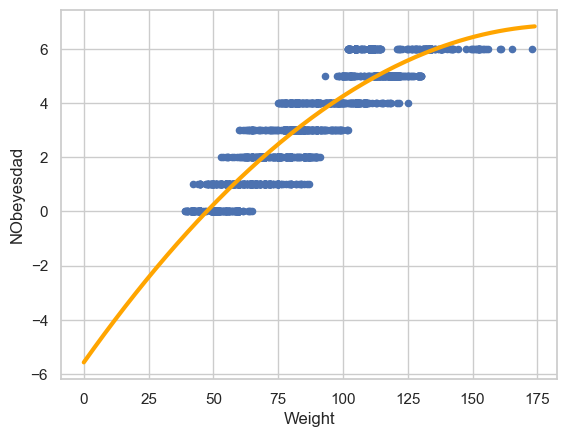

In [90]:
# Add a second order of Weight
dataf.plot(x='Weight',y='NObeyesdad',kind="scatter")

dataf.insert(dataf.columns.size-1,'Weight^2',dataf.Weight**2)
# Reshape to return a numpy array
X=dataf[["Weight","Weight^2"]].values
y=dataf.NObeyesdad.values.reshape(-1,1)

lregmodel=LinearRegression()
lregmodel.fit(X,y)

# Calculate a value from 0 to 175
newX= np.array([range(175),[x**2 for x in range(175)]])

plt.plot(newX[0],lregmodel.predict(newX.T), color='orange',linewidth=3)

Using a higher order feature to the power of 2 can see the linear line bends a bit having a good regression going through the middle of values of weight for each target being the obesity class.

The higher order is done when not having a linear relationship betwen features and targets. The linear regression showed to perform very good on linear relation, thus meaning the higher order was not necassary but it showed that when adding a new feature the linear line only has a small bent. 

### Regularization

A method to find a good balance between under- and overfitting is using Lasso & Ridge regression. Underfitting is when the model can not predict the training and test data. Overftting is when it can predict the data very well, but can no generalize the test data because of variance or complexity. 

Regularization is done to prevent overfitting/underfitting. This dataset has no under- or overifitting but can look at the results of it has an impact or not on the score. 

Lasso regreession is an L1 regularization whereas Ridge regression is an L2 regularization. L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights. 

### Ridge Regression

Using the Ridge regression Alpha is a constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float. Can put it to zero but then it represent Linear Regression. Here will use different Alpha values to compare results. L2 uses the sum of the squared values. 

A high alpha puts more contraints on the model, the higher the smoothness constraints. The higher the alpha the less flexibility it has.

Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

RidgeCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV

In [91]:
dataRidge = dataset.copy()

In [92]:
X=dataRidge.drop('NObeyesdad',axis=1)
Y=dataRidge['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# higher the alpha value, more restriction on the coefficients; low alpha --> more generalization,
# in this case linear and ridge regression resembles
# fit_intercept is default True.
# Solver set to auto wwill choose the best solver for this data, very usefull. 
rr = Ridge(alpha=0.5, solver ='auto', fit_intercept=True)
# Data does not chang only Fit (No transform).
rr.fit(X_train, y_train)
# Predict X_test
y_pred = rr.predict(X_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("ALPHA 0.5")
print("Ridge Train score: ",Ridge_train_score )
print("Ridge Test score: ",Ridge_test_score )
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2 : {r2_score(y_test,y_pred)}")

# Changing the Alpha to 100 can compare the different outcomes of normalization. 
rr100 = Ridge(alpha=100, solver ='auto', fit_intercept=True) 
rr100.fit(X_train, y_train)
y_pred_100 = rr100.predict(X_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("\nALPHA 100")
print("Ridge Alpha 100 Train score: ",Ridge_train_score100 )
print("Ridge Alpha 100 Test score: ",Ridge_test_score100 )
print(f"MAE: {mean_absolute_error(y_test,y_pred_100)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_100)}")
print(f"R2 : {r2_score(y_test,y_pred_100)}")

ALPHA 0.5
Ridge Train score:  0.9493662946215806
Ridge Test score:  0.950975260650936
MAE: 0.3439794897319396
MSE: 0.19853289966468826
R2 : 0.950975260650936

ALPHA 100
Ridge Alpha 100 Train score:  0.9025468597611837
Ridge Alpha 100 Test score:  0.9055663757094008
MAE: 0.5055815014739133
MSE: 0.3824228645616724
R2 : 0.9055663757094008


In [93]:
# Returns the weight of the vectors, having 16 columns -- > 16 vectors and plot them 
print("The coefficients of each column that the values are multiplied with of RR Alpha 0.5:\n",rr.coef_)
print("The coefficients of each column that the values are multiplied with of RR Alpha 100:\n",rr100.coef_)

The coefficients of each column that the values are multiplied with of RR Alpha 0.5:
 [ 3.86448440e-05  1.44815141e-02 -6.92649722e+00  7.69151978e-02
  2.93800971e-01  1.84640274e-02  1.14288213e-03  2.39393986e-02
 -1.61279050e-01 -3.60915059e-02 -1.46145811e-02 -1.24884585e-01
 -1.04788787e-01 -4.05390890e-03 -7.89312698e-02 -2.05013007e-02]
The coefficients of each column that the values are multiplied with of RR Alpha 100:
 [-0.47002619  0.02299758 -0.41950475  0.06846308  0.16417468 -0.06720863
  0.03678078 -0.07279327 -0.21705161 -0.06047603 -0.0358684  -0.01416566
 -0.23919805 -0.03528562 -0.12610596 -0.02759805]


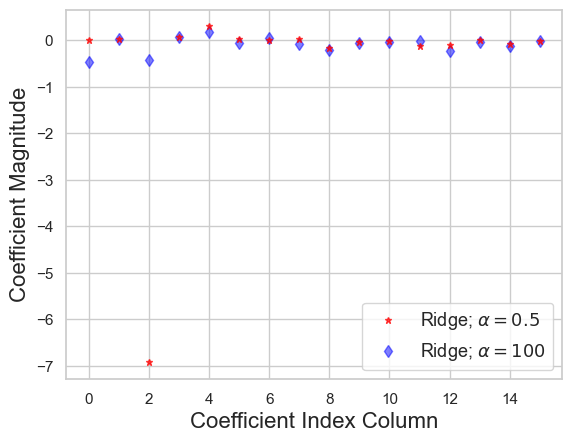

In [94]:
# Plotting the coef of the 2 models agains teach other to visualize. 
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.5$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index Column',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Performing the Ridge regression using Alpha value of 0.5 had a score on the training set of 0.949 and a score of 0.95 on the test set. The test set perfroms slightly better then the training model which is ver good. The MAE is 0.344 and MSE 0.198 having only a very small error rate on the predicted values. The R2 value is 0.95 having only a 5 % chance of wrongly predicting the outcome. The results were expected since the low value is equivelant to the linear regression. 

When increasing the alpha value to 100 the results are significantly worse. The test and train set do score the same being 0.9. The MAE is 0.5 and MSE 0.38 which is an increse in error rate for the model. The R2 value dropped to 0.9 which can here wrongly predict the outcome 10 %. 

The Ridge regression should be performed with low alpha value on this dataset. 

The visualisation of the Ridge Regression coefficients does show with a high alpha value having all indexes close to 0 while with a low value there is a higher varaiotion in coef even dropping down to -7. This is due to the fact of putting so much constraints that the coeff are dropped to zero while a low alpha does not show those hard constraints having more varied coeff. On index column 2 it can be seen the coeff for alpha 0.5 goes to -7. 

### Lasso Regression


L1 regularization, also known as L1 norm or Lasso (in regression problems), combats overfitting by shrinking the parameters towards 0. This makes some features obsolete. Uses the sum of absolute values.

It’s a form of feature selection, because when we assign a feature with a 0 weight, we’re multiplying the feature values by 0 which returns 0, eradicating the significance of that feature. If the input features of our model have weights closer to 0, our L1 norm would be sparse. A selection of the input features would have weights equal to zero, and the rest would be non-zero.

The coeff_used variable is the number of coefficients that are not equal to zero because Lasso regression has a tendency to shrink coefficients towards zero.  
Effectively performing feature selection by setting some coefficients to zero.
Only selects most importtn features. Can check how many features used every model. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [95]:
dataLasso = dataset.copy()

In [96]:
X=dataRidge.drop('NObeyesdad',axis=1)
y=dataRidge['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

lasso = Lasso()
lasso.fit(X_train,y_train)

# The default alpha is 1 & max_iter is 1000.  
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
# Can check of coef used & not used. 
coeff_used = np.sum(lasso.coef_!=0)
coeff_unused = np.sum(lasso.coef_==0)
y_pred_l = lasso.predict(X_test)
print("ALPHA 1")
print("Training score:", train_score)
print("Test score: ", test_score)
print("Number of features used: ", coeff_used)
print("Unused features: ", coeff_unused)
print(f"MAE: {mean_absolute_error(y_test,y_pred_l)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_l)}")
print(f"R2 : {r2_score(y_test,y_pred_l)}")

# Decreasing Alpha value to 0.1
lasso001 = Lasso(alpha=0.01, max_iter=1000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
y_pred_l001 = lasso001.predict(X_test)
print("\nALPHA 0.01")
print("Training score for alpha=0.01:", train_score001)
print("Test score for alpha =0.01: ", test_score001)
print("Number of features used: for alpha =0.01:", coeff_used001)
print(f"MAE: {mean_absolute_error(y_test,y_pred_l001)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_l001)}")
print(f"R2 : {r2_score(y_test,y_pred_l001)}")

# Decreasing Alpha value to 0.01
lasso00001 = Lasso(alpha=0.0001, max_iter=1000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
y_pred_l00001 = lasso00001.predict(X_test)
print("\nALPHA 0.0001")
print("Training score for alpha=0.0001:", train_score00001)
print("Test score for alpha =0.0001: ", test_score00001)
print("Number of features used: for alpha =0.0001:", coeff_used00001)
print(f"MAE: {mean_absolute_error(y_test,y_pred_l00001)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_l00001)}")
print(f"R2 : {r2_score(y_test,y_pred_l00001)}")

ALPHA 1
Training score: 0.8363041939655769
Test score:  0.8400757873345053
Number of features used:  2
Unused features:  14
MAE: 0.6493490472989318
MSE: 0.6499057386883067
R2 : 0.8400757873345053

ALPHA 0.01
Training score for alpha=0.01: 0.9434283779182233
Test score for alpha =0.01:  0.9451321906043961
Number of features used: for alpha =0.01: 8
MAE: 0.37297023895935255
MSE: 0.22297376739346553
R2 : 0.9451321906043961

ALPHA 0.0001
Training score for alpha=0.0001: 0.9495099329723794
Test score for alpha =0.0001:  0.9518051889993124
Number of features used: for alpha =0.0001: 15
MAE: 0.3414762167939869
MSE: 0.1958557977075054
R2 : 0.9518051889993124


When using the Lasso Regression with the default Alpha the scores for training and test set are very low being 0.83 and 0.84. When checking the amount of features used it says 2. Thi is beacause the coefficients are forced towards zero and only 2 non-zero coefficients are used. THE MAE is 0.65 and the MSE is 0.65 having a high error rate. The R2 is 0.84 predicting 16 % wrong. 

With an Alpha score of 0.01 the values start to get better. The training and test set are 0.94 which is significantly higher. When checking the amount of features used it says 8. This is beacause less the coefficients are forced towards zero, being less strict. THE MAE is 0.34 and the MSE is 0.19 having a samller error rate. The R2 is 0.95 predicting only 5 % wrong. This is an increase in results compared to previous results. 

With an Alpha score of 0.0001 the values are a bit increased. The training and test set are 0.95 which is significantly higher. When checking the amount of features used it says 15. Almost every coef is used now. THE MAE is 0.34 and the MSE is 0.19 having a samll error rate. The R2 is 0.95 predicting only 5 % wrong. 

It is expected when decreasing the alpha value the results improve, this is because the more having alpha closer to zero the more it comes closer to a linear regression. Lasso regression is not a good technique. Putting more constraints on the coeff and pushing the values towards zero does make the model much worse.

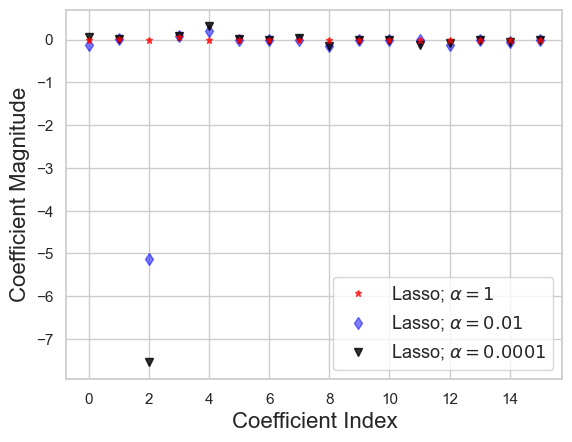

In [97]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

## Part 5: classification

Use one or more classification techniques to predict a target class. If you choose a technique that is not discussed the course unit, provide a brief description of the technique in your report. If there is no class attribute provided or there are multiple class attributes available, create and/or choose one class attribute. After the models construction, use a test set to test your model. Show interesting metrics for the model and try to optimize it. For this you can use normalization, regularization, hyperparameter tuning, higher order features. Describe as much as possible what you have tried and what works and what doesn't work for your dataset.

Ridge classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier

### Logistic Regression

Accuracy is the number of correctly predicted data points out of all the data points.

Recall is the ability of a model to find all the relevant cases within a data set, sensitivity.

Precision is the ability of a classification model to identify only the relevant data points.

F1 is the harmonic mean of Precision and Recall. This score takes both false positives and false negatives into account.


Logistic: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [98]:
dataLogistic = dataset.copy()

In [99]:
# Split data into features and targets (or X, y depending on your preference)
# Split the data into features and targets
X = dataLogistic.drop("NObeyesdad",axis=1) # X -- > Features
y = dataLogistic["NObeyesdad"] # y -- > Targets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The three scalers had practically the same results. Since the data set contains no outliers (RobustScaler filters out) and contains 2111 attributes (Maye a lot for Min-Max Scaler). Here use the standard Scaler, which will make practically no difference.

In [101]:
scaler=StandardScaler()

# Now it has an average of 0 and some bit lower and higher -- > .transform.
X_train_scaled = scaler.fit_transform(X_train)
# Do not fit the X_test set -- > Should be example of real life data.
X_test_scaled = scaler.transform(X_test)
# Values are now pushed towards zero.
print("X test scaled data of the first row using StandardScaler:\n",X_test_scaled[0])
print("X train scaled data of the first row using StandardScaler:\n",X_train_scaled[0])

X test scaled data of the first row using StandardScaler:
 [-1.02000198 -0.62484734  0.56944867 -1.26594419  0.47018168  0.35087545
 -0.77866739  1.54875157  1.89686528 -0.15696395 -0.22778319 -0.21050688
  2.22753728  2.24709931 -1.40425203 -0.17232483]
X train scaled data of the first row using StandardScaler:
 [ 0.98039025 -0.98824201  0.39873626 -0.0235115  -2.12683744 -2.85001415
  1.08665311  0.41145384 -0.29444804 -0.15696395 -0.00611248 -0.21050688
  2.38264709 -1.06318882 -1.40425203 -0.17232483]


Setting up the Logistic Regression model.

In [102]:
# C is inverse of regularization strength. Complexity of an model Increasing is overfitting, lowering underfitting. 
# Default C is 1
LogModel=LogisticRegression(penalty="l2", C=1, max_iter=1000) # Default penalty is l2
LogModel.fit(X_train_scaled,y_train)

LogisticRegression(C=1, max_iter=1000)

Logistic Regression score of training data:  0.888967468175389
Logistic Regression score of test data:  0.8680057388809183
Y-TEST SET


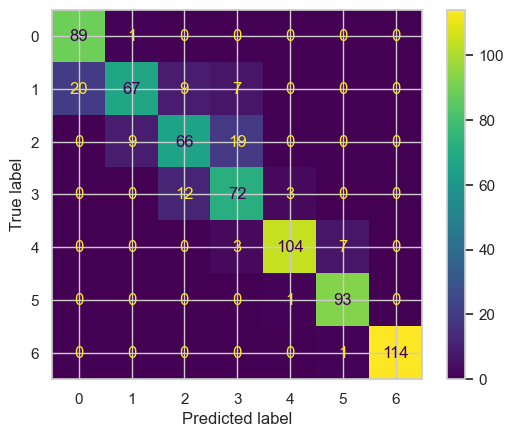

Y-TRAIN SET


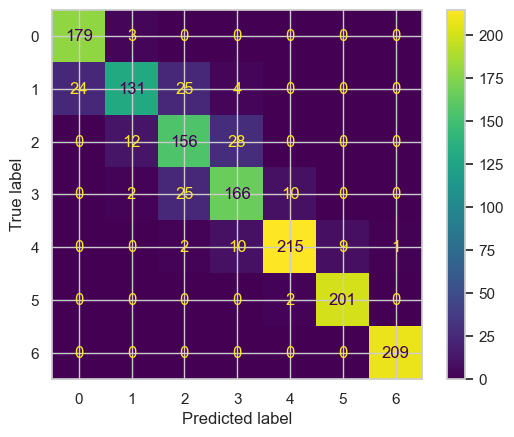

Y-TEST SET
Accuracy:  0.8680057388809183
Recall:  0.8660049919944637
Precision:  0.8631272357932184
F1-score:  0.8600817570819741

Classification report 
               precision    recall  f1-score   support

           0       0.82      0.99      0.89        90
           1       0.87      0.65      0.74       103
           2       0.76      0.70      0.73        94
           3       0.71      0.83      0.77        87
           4       0.96      0.91      0.94       114
           5       0.92      0.99      0.95        94
           6       1.00      0.99      1.00       115

    accuracy                           0.87       697
   macro avg       0.86      0.87      0.86       697
weighted avg       0.87      0.87      0.87       697

Y-TRAIN SET
Accuracy:  0.888967468175389
Recall:  0.8866351631117368
Precision:  0.8877861390692059
F1-score:  0.8852561418137664

Classification report 
               precision    recall  f1-score   support

           0       0.88      0.98     

In [103]:
# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Logistic Regression score of training data: ",LogModel.score(X_train_scaled,y_train))
print("Logistic Regression score of test data: ",LogModel.score(X_test_scaled, y_test))
# The test data is lower then the training data -- > The test model performs here slighlty worse.

# Predict values for the test set
# y_pred is actually we use the X dataset the predict the Y dataset.
y_pred_test = LogModel.predict(X_test_scaled)
y_pred_train = LogModel.predict(X_train_scaled)

cf_test = confusion_matrix(y_test,y_pred_test)
cf_train = confusion_matrix(y_train,y_pred_train)
matrix_test = ConfusionMatrixDisplay(cf_test ,display_labels=LogModel.classes_) # Without display_labels it will show class
matrix_train = ConfusionMatrixDisplay(cf_train ,display_labels=LogModel.classes_)                                                          

print("="*30 + "\nY-TEST SET\n" + "="*30)
matrix_test.plot()
plt.show()
print("="*30 + "\nY-TRAIN SET\n" + "="*30)
matrix_train.plot()
plt.show()

# Working with a multiclass label target -- > 7 target classes. 
# macro: Calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
print("="*30 + "\nY-TEST SET\n" + "="*30)
print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test, average='macro'))
print("Precision: ",precision_score(y_test, y_pred_test, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_test, average='macro'))
print("\nClassification report \n",classification_report(y_test, y_pred_test))
print("="*30 + "\nY-TRAIN SET\n" + "="*30)
print("Accuracy: ",accuracy_score(y_train, y_pred_train))
print("Recall: ",recall_score(y_train, y_pred_train, average='macro'))
print("Precision: ",precision_score(y_train, y_pred_train, average='macro'))
print("F1-score: ",f1_score(y_train, y_pred_train, average='macro'))
print("\nClassification report \n",classification_report(y_train, y_pred_train))
print()

The scores without scaling were for the train model 0.88. The test model has an score of 0.86 which is not quite as good. Scaling might be good to improve results. 

The score of the training set is 0.89 and the test set has a score of 0.87 performing slightly worse then the trainig set. The matrix plot shows that a lot of the values are correctly predicted being the True values diagonally. Only having a slight error rate on correctly predicting the data where there is data predicted only one class difference of the original data. 

The train set has an accuracy, recall, F1-score and an precision of 0.89.
The test set has an accuracy, recall of 0.87 and an F1-score and precision of 0.86. 

Overall the scores are not the best bot not that bad. The model can only predict 87 % of the data correct being still a high error rate on the data. The sensitivity can difinitly improve, maybe using a different model or hyperparameter testing can be done to improve the results. 

### Hyperparameter Tuning

Using Logistic Regression gave us not the results wanted. After performing the Linear Regression the results where relatively high. Wondering if it is possible when performing can use a Grid search where all sort of parameters are parsed to and a model of choice and it will test every combination finding the best possible solution. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [104]:
LogModel=LogisticRegression(max_iter = 10000) # Default penalty is l2
# All the parameters we want to test
parameters = [{"C":np.linspace(1,10,5),  
               "penalty":["l1","l2","elasticnet"],
               "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
               "class_weight":["balanced", None],
               "multi_class":["auto","ovr","multinomial"]
              }] 

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=LogModel,
                           n_jobs=-1, 
                           cv = 5,
                           param_grid=parameters,             
                           verbose=4
                           )
# Fit the training data
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1300 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\uniro\AppData\Local\Programs

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]),
                          'class_weight': ['balanced', None],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=4)

When testing the grid search I came upon errors that would not results in any scores produced. Some of these settings then produced even scores when paired with other parameters. I had to lower the "C" from 20 to 10 to have no nan values produced. For the penalty L1 as elasticinet there were a lot of nan values present but still there were models produced with good scores using the params. THis taking in account still got a succesfull model with all working params togheter. 

In [105]:
# Print the score on test set (best model of our grid search)
print(f"Score of best model: {grid_search.score(X_test_scaled,y_test)}")

# Predict values for test set for best model
y_pred=grid_search.predict(X_test_scaled)

# Print classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

# What where the best parameters for out model?
print("\nBest parameters:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Score of best model: 0.9612625538020086

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        90
           1       0.99      0.90      0.94       103
           2       0.92      0.93      0.92        94
           3       0.93      0.92      0.92        87
           4       0.99      0.98      0.99       114
           5       0.97      1.00      0.98        94
           6       1.00      0.99      1.00       115

    accuracy                           0.96       697
   macro avg       0.96      0.96      0.96       697
weighted avg       0.96      0.96      0.96       697


Best parameters:
{'C': 3.25, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=3.25, class_weight='balanced', max_iter=10000,
                   penalty='l1', solver='saga')


The score of the best model is 0.96, which is almost a model that can perfictly predict the outcome. The test set has an accuracy, recall, F1-score and an precision of 0.97. This is a practically the same result then the parameters used in previous model. The parameters used for logistic regression are: 'C': 3.25, 'class_weight': 'balanced', 'multi_class': 'auto','penalty': 'l1', 'solver': 'saga'

When performing the GridSearch there were many nan values but still out of all models tested there was a good model that came out of the search. The nan values can just be ignored since the model only uses model with a score. 

### Naive Bayes

Multinomial Naïve Bayes (MultinomialNB): This type of Naïve Bayes classifier assumes that the features are from multinomial distributions. This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam classification. Since working with a lot of categorical columns will try to use this classsifier here. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [106]:
dataNB = data.copy()

In [107]:
X=dataNB.drop("NObeyesdad",axis=1) # Features
y=dataNB["NObeyesdad"] #-- > Target

In [108]:
# Split into training and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [109]:
# Create an empty multinomial naive bayes model
# Using an Alpha 5 will make hte model smoother
modelNB = MultinomialNB(alpha=5)

# Fit the model
modelNB.fit(X_train,y_train)

# Print both the score for the training and the test set
print("Train score: ",modelNB.score(X_train,y_train))
print("Test score: ",modelNB.score(X_test,y_test))
# This will show the first ray of the dataset & values and use an array to predict to use 1 value
# Use the reshape will make it from an double array to one. 
print("\nPredicting the Obesity Class for first row: ",X_test.values[0])
# Need to reshape otherwise it wont see the 16 values from one row but as 1 rows from all diff rows. 
print("The actual Obesity class is:",y_test.values[0], ". The predicted class is:",modelNB.predict(X_test.values[0].reshape(1,-1)))
probabilities = modelNB.predict_proba(X_test.values[0].reshape(1,-1))[0]
print("The chances it to be classified for each class are:", *[f"\t{cla}:{round(val,2)}" for cla,val in zip(modelNB.classes_,probabilities)],sep="\n")

print()
# Predict some flowers and show the probabilities
print("Predicting the Obesity Class for second row: ",X_test.values[1])
print("The actual class is:",y_test.values[1], ". The predicted class is:",modelNB.predict(X_test.values[1].reshape(1,-1)))
probabilities = modelNB.predict_proba(X_test.values[1].reshape(1,-1))[0]
print("The chances it to be classified for each class are:", *[f"\t{cla}:{round(val,3)}" for cla,val in zip(modelNB.classes_,probabilities)],sep="\n")


Train score:  0.5919377652050919
Test score:  0.6011477761836442

Predicting the Obesity Class for first row:  [ 0.       20.406871  1.755978 53.699561  1.        1.        2.
  3.891994  2.        0.        1.86393   0.        2.870127  2.
  0.        3.      ]
The actual Obesity class is: 0 . The predicted class is: [0]
The chances it to be classified for each class are:
	0:0.7
	1:0.24
	2:0.03
	3:0.02
	4:0.01
	5:0.0
	6:0.0

Predicting the Obesity Class for second row:  [  0.        26.         1.62495  111.00492    1.         1.
   3.         3.         1.         0.         2.704315   0.
   0.         0.322666   1.         3.      ]
The actual class is: 6 . The predicted class is: [6]
The chances it to be classified for each class are:
	0:0.0
	1:0.002
	2:0.032
	3:0.034
	4:0.165
	5:0.178
	6:0.59


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Altough the score is very low 0.6, it correclty succeeded in predicting thee first two rows of the dataset. When looking at the chances of prediction it is only 60 a 70 % sure and having a 20 a 25 % chance of saying it is the class next to it. 


Classification report 
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        90
           1       0.74      0.39      0.51       103
           2       0.58      0.39      0.47        94
           3       0.33      0.33      0.33        87
           4       0.35      0.43      0.38       114
           5       0.61      0.71      0.66        94
           6       0.93      1.00      0.96       115

    accuracy                           0.60       697
   macro avg       0.61      0.60      0.59       697
weighted avg       0.61      0.60      0.59       697



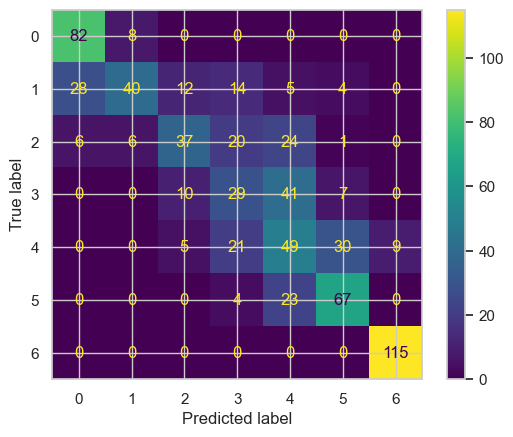

In [110]:
# Predict gives the class 
# Predict proba gives percentage of the class. 
y_pred_test = modelNB.predict(X_test)

print("\nClassification report \n",classification_report(y_test, y_pred_test))

cf_test = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

The precision, accuracy and recall score here only a 0.59, and the F1 score a 0.58. The classification matrix shows the high distribution around the diagonal interception of equal classes, meaning a lot of these classes are wrongly predicted or not sure of correct prediction. With having an error rate up to 40 %, indicates this being a very bad model to predict the outcome of the Obesity Class. 

Maybe can use a scaler such as MinMax to improve the results. A Standard scaler will not work since the NaiveBayes does not take negative data and would only give errors.

In [111]:
MinMax = MinMaxScaler()

X_train_scaled = MinMax.fit_transform(X_train)
X_test_scaled = MinMax.transform(X_test)

In [112]:
modelNB = MultinomialNB(alpha=5)

# Fit the model
modelNB.fit(X_train_scaled,y_train)

# Print both the score for the training and the test set
print("Train score: ",modelNB.score(X_train_scaled,y_train))
print("Test score: ",modelNB.score(X_test_scaled,y_test))

Train score:  0.41089108910891087
Test score:  0.430416068866571


Having a far worse performance with scaling it is not sufficient to optimize this model anymore.

### K-neighbours Classifier

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
KClasData = data.copy()

In [115]:
X=KClasData.drop("NObeyesdad",axis=1) # Features
y=KClasData["NObeyesdad"] #-- > Target

In [116]:
# Split into training and test split
a

In [117]:
KNClas = KNeighborsClassifier()

KNClas.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
print("The score of the training set: ",KNClas.score(X_train, y_train))
print("The score of the test set: ",KNClas.score(X_test, y_test))

The score of the training set:  0.9123055162659123
The score of the training set:  0.8622668579626973


In [119]:
y_pred_test = KNClas.predict(X_test)
y_pred_train = KNClas.predict(X_train)


Classification report 
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        90
           1       0.78      0.51      0.62       103
           2       0.77      0.84      0.80        94
           3       0.85      0.80      0.83        87
           4       0.91      0.94      0.92       114
           5       0.93      0.97      0.95        94
           6       0.97      0.99      0.98       115

    accuracy                           0.86       697
   macro avg       0.86      0.86      0.85       697
weighted avg       0.86      0.86      0.86       697



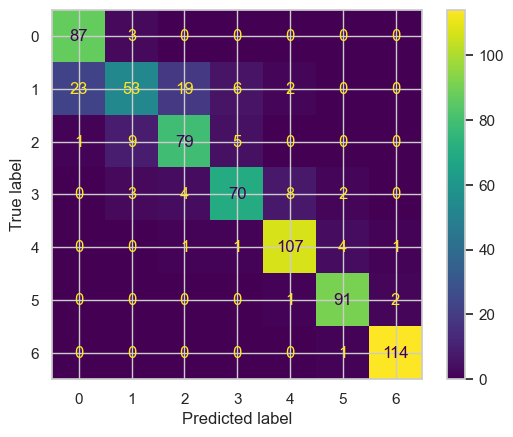

In [120]:
print("\nClassification report \n",classification_report(y_test, y_pred_test))

cf_test = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

### RandomForestClassifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
ForClasData = data.copy()

In [123]:
X=ForClasData.drop("NObeyesdad",axis=1) # Features
y=ForClasData["NObeyesdad"] #-- > Target

In [124]:
# Split into training and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [125]:
RFClas = RandomForestClassifier()

RFClas.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
print("The score of the training set: ",RFClas.score(X_train, y_train))
print("The score of the training set: ",RFClas.score(X_test, y_test))

The score of the training set:  1.0
The score of the training set:  0.9426111908177905



Classification report 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.82      0.92      0.87       103
           2       0.89      0.85      0.87        94
           3       0.95      0.92      0.94        87
           4       0.99      0.96      0.97       114
           5       0.97      0.99      0.98        94
           6       1.00      0.99      1.00       115

    accuracy                           0.94       697
   macro avg       0.94      0.94      0.94       697
weighted avg       0.95      0.94      0.94       697



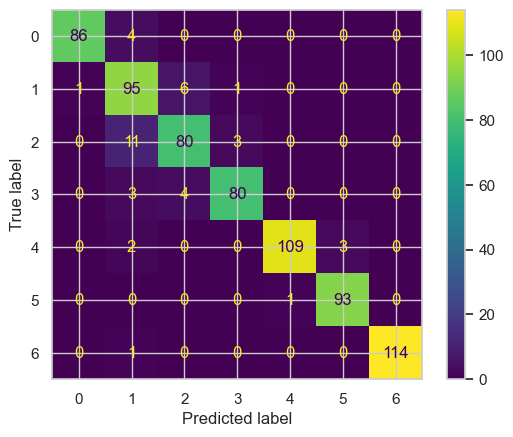

In [127]:
y_pred_test = RFClas.predict(X_test)
y_pred_train = RFClas.predict(X_train)

print("\nClassification report \n",classification_report(y_test, y_pred_test))

cf_test = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

### Decision Tree Classifier

A decision tree classifier is a non-parametric supervised learning method used for classification and regression. It is a tree in which each internal (non-leaf) node is labeled with an input feature. The arcs coming from a node labeled with an input feature are labeled with each of the possible values of the target feature or the arc leads to a subordinate decision node on a different input feature.

The biggest advantage of decision trees is that they make it very easy to interpret and visualize nonlinear data patterns.

You can build a decision tree classifier from the training set (X, y) using the sklearn.tree.DecisionTreeClassifier module in Python.

Decesion Tree Classifer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [128]:
dataTree = data.copy()

Creating a features and target objects for the set. 

In [129]:
X=dataTree.drop("NObeyesdad",axis=1) # Features
y=dataTree["NObeyesdad"] #-- > Target

Splitting the features and tergets into a training set to train the model and a test set to test the score of the model. 

In [130]:
# Split into training and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Can use a Scaler, this is not necassary but maybe it can help improve results. Have to fit and transform (needed when scaling data) of training set. Only transform of test set. 

In [131]:
# The scaler will return an numpay array. 
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a empty DecisionTreeClassifier with a random state to have the same result each time. Here fit the training data to train the model. 

In [132]:
DTCmodel = DecisionTreeClassifier(random_state= 5)

DTCmodel.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=5)

In [133]:
print("The score of the training set: ",DTCmodel.score(X_train_scaled, y_train))
print("The score of the training set: ",DTCmodel.score(X_test_scaled, y_test))

The score of the training set:  1.0
The score of the training set:  0.9110473457675753


The score of the training set is 1 which is the best possible score having everything correctly fitted. The test score is 0.91 which is worse then the training set score. Still it only predicts 9 % of the values wrong. 

In [134]:
print("The actual Obesity class is:",y_test.values[0], ". The predicted class is:",DTCmodel.predict(X_test_scaled[0].reshape(1,-1)))
# probabilities returns an array with a value per category, the score of how sure it is for each class. 
probabilities = DTCmodel.predict_proba(X_test_scaled[0].reshape(1,-1))[0]
print("The chances it to be classified for each class are:", *[f"\t{cla}:{round(val,2)}" for cla,val in zip(DTCmodel.classes_,probabilities)],sep="\n")

print("The actual Obesity class is:",y_test.values[23], ". The predicted class is:",DTCmodel.predict(X_test_scaled[23].reshape(1,-1)))
probabilities = DTCmodel.predict_proba(X_test_scaled[23].reshape(1,-1))[0]
print("The chances it to be classified for each class are:", *[f"\t{cla}:{round(val,2)}" for cla,val in zip(DTCmodel.classes_,probabilities)],sep="\n")

print("The max depth of the decision tree is: ",DTCmodel.get_depth())
print("The number of leaves here is: ",DTCmodel.get_n_leaves())

# y_pred is actually we use the X dataset the predict the Y dataset.
y_pred_test = DTCmodel.predict(X_test_scaled)
y_pred_train = DTCmodel.predict(X_train_scaled)

The actual Obesity class is: 0 . The predicted class is: [0]
The chances it to be classified for each class are:
	0:1.0
	1:0.0
	2:0.0
	3:0.0
	4:0.0
	5:0.0
	6:0.0
The actual Obesity class is: 4 . The predicted class is: [4]
The chances it to be classified for each class are:
	0:0.0
	1:0.0
	2:0.0
	3:0.0
	4:1.0
	5:0.0
	6:0.0
The max depth of the decision tree is:  15
The number of leaves here is:  97


In [135]:
display(X_test)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
544,0,20.406871,1.755978,53.699561,1,1,2.000000,3.891994,2,0,1.863930,0,2.870127,2.000000,0,3
1987,0,26.000000,1.624950,111.004920,1,1,3.000000,3.000000,1,0,2.704315,0,0.000000,0.322666,1,3
420,1,18.000000,1.850000,60.000000,1,1,3.000000,4.000000,1,0,2.000000,1,2.000000,0.000000,1,4
527,0,21.000000,1.520000,42.000000,0,1,3.000000,1.000000,2,0,1.000000,0,0.000000,0.000000,1,3
196,1,22.000000,1.750000,74.000000,1,0,2.000000,3.000000,1,0,2.000000,0,1.000000,2.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,20.908785,1.700996,126.490236,1,1,3.000000,3.000000,1,0,1.242832,0,0.530925,0.575969,1,3
1067,1,31.484494,1.707613,82.586893,1,1,2.795086,3.250467,1,0,1.367876,0,0.022958,0.000000,0,4
1617,1,40.973007,1.749405,109.908779,1,1,2.176317,2.986637,1,0,1.015672,0,0.941410,0.000000,0,4
311,1,17.000000,1.720000,62.000000,0,1,2.000000,3.000000,3,0,2.000000,0,3.000000,1.000000,0,3


In [136]:
print(X_test.values[1])
print(X_test_scaled[1])

[  0.        26.         1.62495  111.00492    1.         1.
   3.         3.         1.         0.         2.704315   0.
   0.         0.322666   1.         3.      ]
[-1.02000198  0.21961555 -0.83048289  0.93829989  0.47018168  0.35087545
  1.08665311  0.41145384 -0.29444804 -0.15696395  1.14128225 -0.21050688
 -1.20031018 -0.5291301   0.53104268 -0.17232483]


In NumPy, reshape(1,-1) means that you want to reshape the array to have 1 row and an unknown number of columns. The -1 in the second dimension means that you want NumPy to automatically calculate the number of columns based on the total number of elements in the array.

For example, if you have a 1D array with 12 elements, you can use reshape(1,-1) to reshape it to a 2D array with 1 row and 12 columns. The reshape() function will automatically calculate the number of columns based on the total number of elements in the array.

Reshape(-1,1) will reshape the array or Series into a 2-dimensional array with as many rows as there are elements in the original array or Series, and one column.

In [137]:
X_test_scaled.reshape(1,-1)

array([[-1.02000198, -0.62484734,  0.56944867, ...,  0.59195525,
         0.53104268, -0.17232483]])

This error occurs when you try to access the .values attribute of a numpy.ndarray object, which does not exist. The .values attribute is only available for pandas DataFrame or Series objects, which can be converted to numpy arrays using this attribute. If you already have a numpy array, you don’t need to use .values on it. You can check the type of your object using the type() function in Python. To fix this error, you should either use a pandas object with .values or use a numpy array without it. For example:

#### Using pandas

import pandas as pd 

df = pd.DataFrame({‘x’: [1, 2, 3], ‘y’: [4, 5, 6]}) 

scaler = StandardScaler() 

scaled_df = scaler.fit_transform(df) # returns a numpy array 

print(scaled_df.values) # error


#### Using numpy

import numpy as np arr = np.array([[1, 2, 3], [4, 5, 6]]) 

scaler = StandardScaler() 

scaled_arr = scaler.fit_transform(arr) # returns a numpy array 

print(scaled_arr.values) # error


#### Fixing the error

import pandas as pd 

df = pd.DataFrame({‘x’: [1, 2, 3], ‘y’: [4, 5, 6]}) 

scaler = StandardScaler() 

scaled_df = scaler.fit_transform(df) # returns a numpy array 

print(scaled_df) # no error


import numpy as np 

arr = np.array([[1, 2, 3], [4, 5, 6]]) 

scaler = StandardScaler() 

scaled_arr = scaler.fit_transform(arr) # returns a numpy array 

print(scaled_arr) # no error

In [138]:
print("\nClassification report \n",classification_report(y_test, y_pred_test))


Classification report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.81      0.77      0.79       103
           2       0.82      0.81      0.81        94
           3       0.91      0.94      0.93        87
           4       0.95      0.95      0.95       114
           5       0.97      0.97      0.97        94
           6       1.00      0.99      1.00       115

    accuracy                           0.91       697
   macro avg       0.91      0.91      0.91       697
weighted avg       0.91      0.91      0.91       697



The classification report indicate the precision, recall, accuracy and F1-score all have a results of 0.91. This is a relatively high score predicting a lot of the data correct. Thus only predicting 9 % of data wrong. 

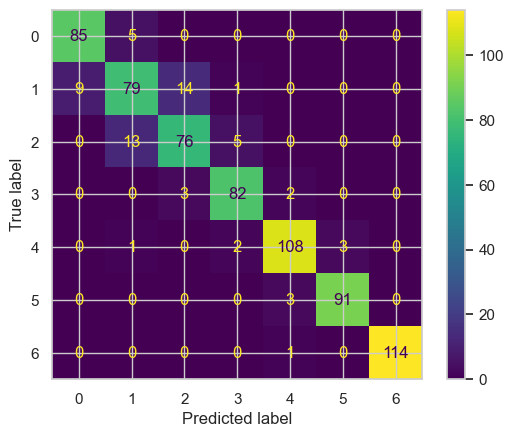

In [139]:
cf_test = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

The Confusion matrix indicates almost predicitng everything in the diagonal scale which is the correct category. Still there is a small error rate especially at the start around normal weight/insuffiecient weight which are the first categorys.

Plotting the decision tree to see visually how decisions are made. When increasing the font the labals got stacked one ach other what makes it hard to see. Could not find a way to display them properly, could change it be decreasing depth and decision of tree but that will make the model much worse. 

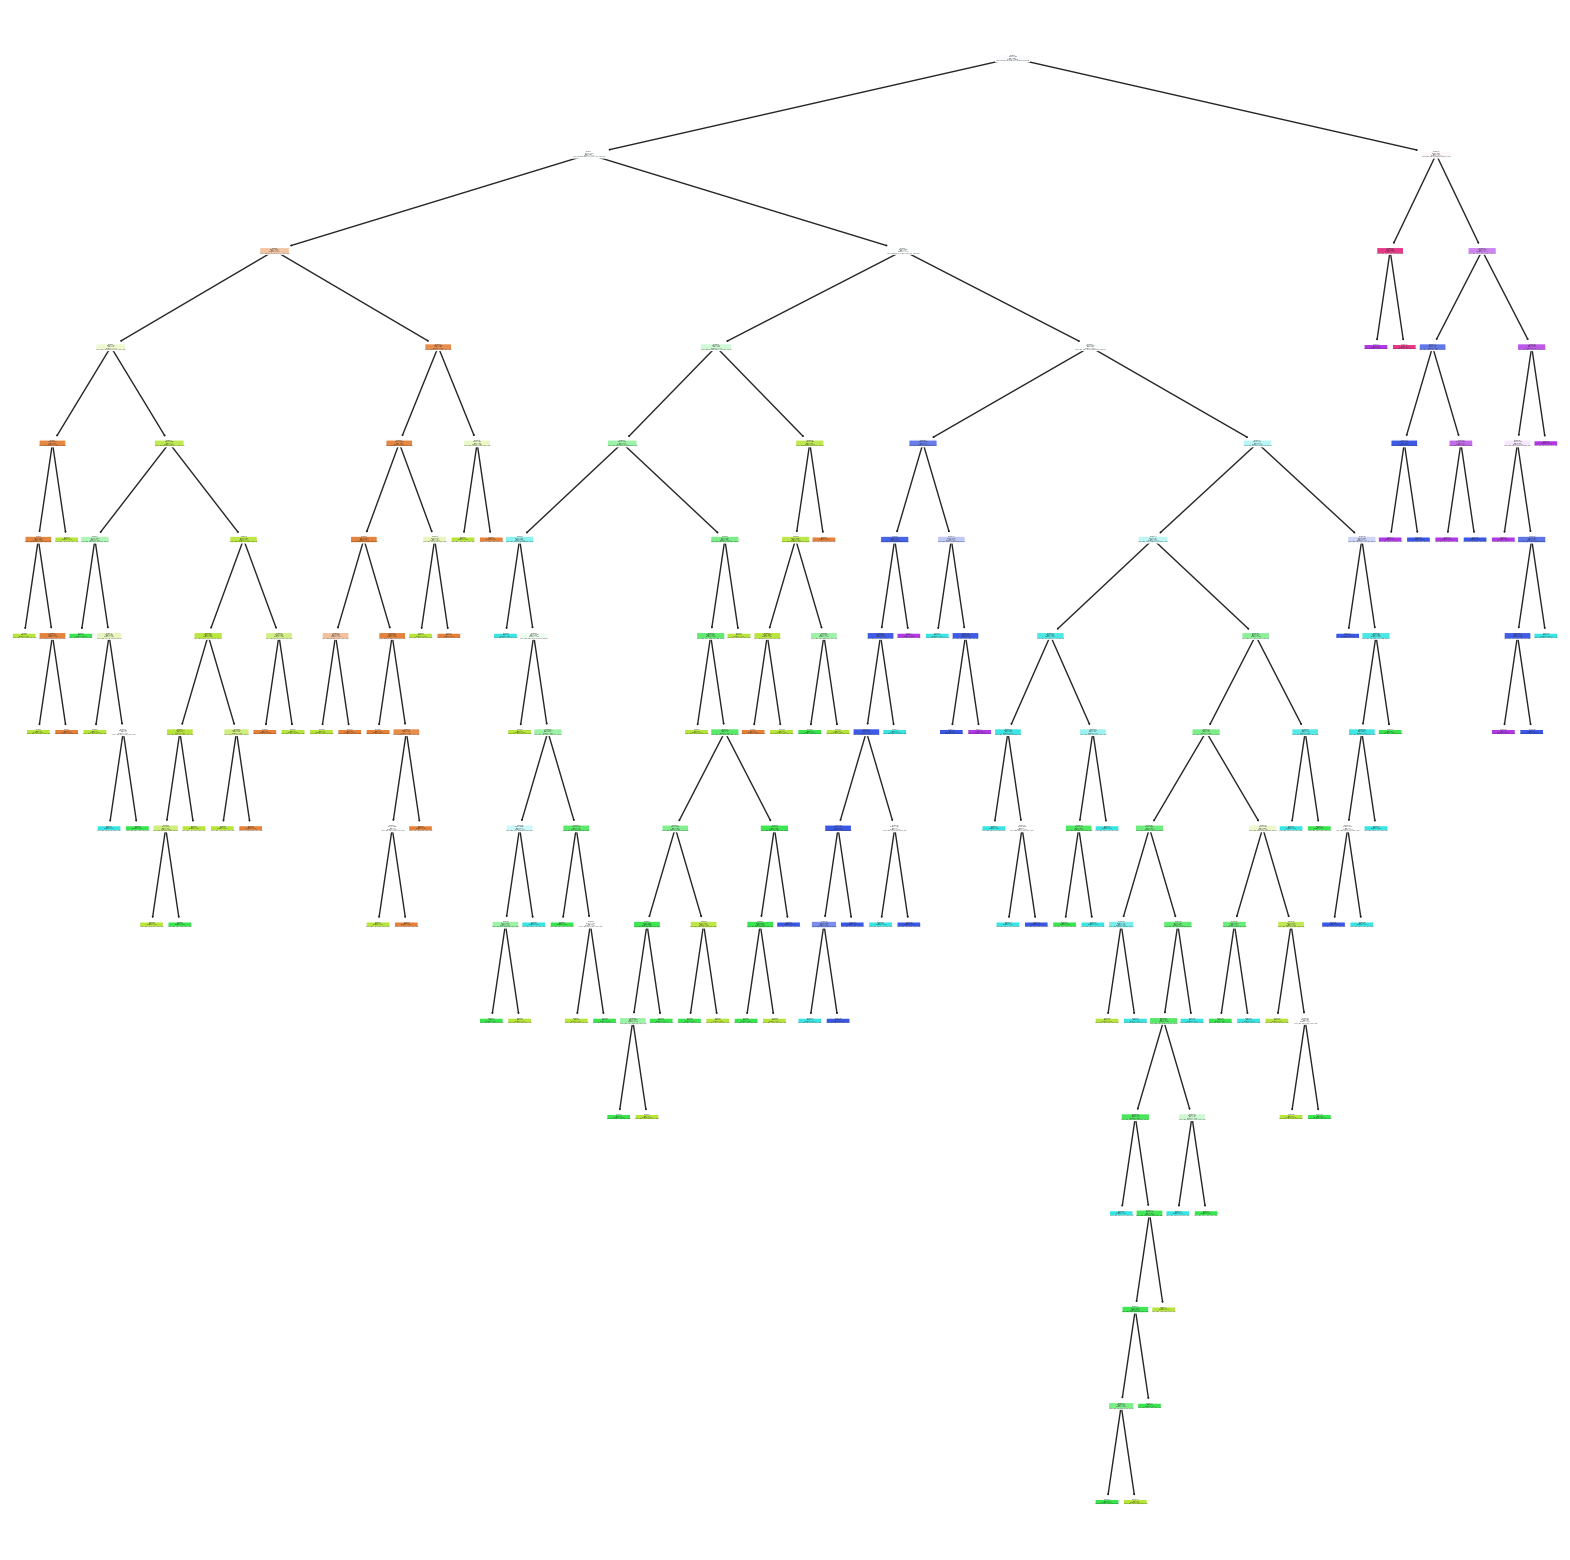

In [140]:
plt.figure(figsize=(20,20))  # Increase the size of the plot
plot_tree(DTCmodel, filled=True, rounded=True, proportion=True, node_ids=True)#, fontsize=18)  # Display the decision tree
plt.show()  # Show the plot

### Stacking

Combining serveral base models in order to produce one optimal predictive model. This by combining different models into one this to see if the score of the model can improve or not. Using the combination of 3 different classifcation technique with some of the parameters that proved to be promising for he score of the model. 

In [141]:
dataStack = data.copy()

In [142]:
X=dataStack.drop("NObeyesdad",axis=1) # Features
y=dataStack["NObeyesdad"] #-- > Target

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [144]:
estimators = [('LogisticModel',LogisticRegression(penalty="l2", C=3.25, 
                                                  max_iter=100000, 
                                                  class_weight="balanced", solver = "saga")),
              ('NBModel',MultinomialNB(alpha=1)),
              ('DTModel',DecisionTreeClassifier())] 

stackClassifier = StackingClassifier(estimators=estimators)
# Fit data
stackClassifier.fit(X_train,y_train)

# Predict testing data
y_pred = stackClassifier.predict(X_test)

Setting up the classifiers being LogisticRegression, NaiveBayes model, DecisionTreeModel all togheter will be used to generalize the output creating one final model that can be used for classification. 

Train score: 1.0
Test score: 0.9153515064562411
[[ 86   4   0   0   0   0   0]
 [  9  82  11   1   0   0   0]
 [  0  13  75   6   0   0   0]
 [  0   0   3  82   2   0   0]
 [  0   1   0   3 108   2   0]
 [  0   0   0   0   3  91   0]
 [  0   0   0   0   1   0 114]]


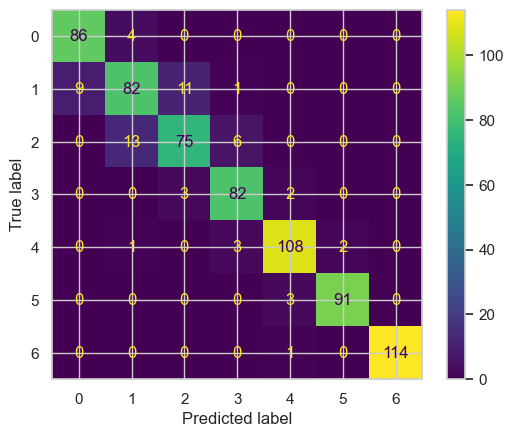

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.82      0.80      0.81       103
           2       0.84      0.80      0.82        94
           3       0.89      0.94      0.92        87
           4       0.95      0.95      0.95       114
           5       0.98      0.97      0.97        94
           6       1.00      0.99      1.00       115

    accuracy                           0.92       697
   macro avg       0.91      0.91      0.91       697
weighted avg       0.91      0.92      0.91       697



In [145]:
print(f"Train score: {stackClassifier.score(X_train, y_train)}")
print(f"Test score: {stackClassifier.score(X_test, y_test)}")

y_pred_test = stackClassifier.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_pred_test))

cf = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_pred_test))

The score of the training model is 0.998 which is almost a perfect score. The training score on the other hand is a 0.919 which is quite a diffetence from the model. 

The visualization shows that very large part of the data is predicted on the diagonal part of the Confusion matrix/plot. 

The Precision, Recall and F1-score are 0.91 what is overall good performance. This with an Accuracy of 0.92. Personally I would not use this way of creating a model. There were better results on the test model this by using the independant models with some hyperparameters added.

## Part 6: clustering

Test clustering on the Obesity dataset used in the report. Clustering will try to fit the data in groups that fit togheter.

### K-means Clustering

This will categorize the items in k groups of similarity. Euclidean distance is used as measurement to calculate similarity. 

The algorithm works in three major steps:
* Initialization centroids
* Categorizing samples
* Update centroids


In [146]:
dataClus = data.copy()

Can create a feature set, do not need the target set when clustering. 

In [147]:
X=dataClus.drop("NObeyesdad",axis=1) 
# Targets will not be needed for K clustering.
y=dataClus["NObeyesdad"] 

In [148]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3


Will try clustering when scaling the data to see if the results do improve. 

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Setting up a loop the see when the amount of clusters has the lowest within cluster sum of squared errors (WCCSE). Can set up a loop to test between 1 to 10 clusters and plot the results to see what is the best amount of clusters.

model.inertia_: sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

In [150]:
# Calculate the wcss for models ranging between 1 and 10 clusters
wcss = []
wcss_scaled = []

for K in range(1, 11):
    # Initialize the model
    Kmodel = KMeans(n_clusters=K)
    # Calculate WCCSE for unscaled 
    Kmodel.fit(X)
    wcss.append(Kmodel.inertia_)
    # Calculate WCCSE for scaled 
    Kmodel.fit(X_scaled)
    wcss_scaled.append(Kmodel.inertia_)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

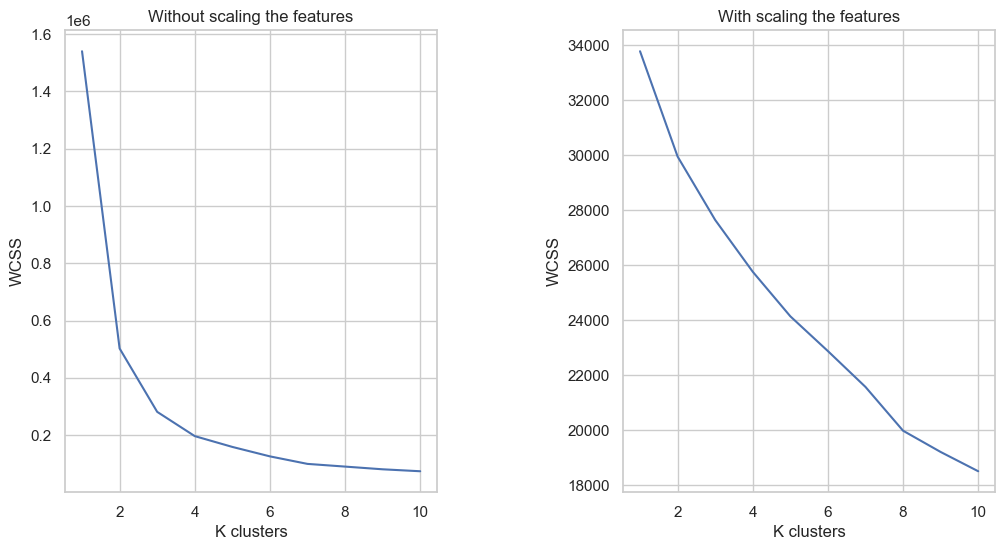

In [151]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.plot(range(1,11), wcss)
ax1.set_xlabel('K clusters')
ax1.set_ylabel("WCSS")
ax1.set_title("Without scaling the features")

ax2.plot(range(1,11), wcss_scaled)
ax2.set_xlabel('K clusters')
ax2.set_ylabel("WCSS")
ax2.set_title("With scaling the features")

plt.subplots_adjust(wspace=0.5)

plt.show()

After performing the K-means clustering for the amount of clusters from 1 to 10 for scaled and unscaled data. Can see for the unscalede data that the clsuters formed after 4 have decent results and at 7 the last elbow it has the lowest WCCSE. When scaling the data get a really bad WCCSE plot where there is really no elbow it drops almost linear having no decent idea what amount of clusters to use. For further clustering will only use unscaled data. 

Setting up a model with 7 clusters and increasing the iteration to 500. The random state is set to get the same results each time. The algorithm used is elkan, can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape

In [152]:
KMeansModel=KMeans(n_clusters=7, max_iter = 1000, random_state = 0, algorithm="elkan")
KMeansModel.fit(X)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(algorithm='elkan', max_iter=1000, n_clusters=7, random_state=0)

In [153]:
label = KMeansModel.predict(X)
print(KMeansModel.score(X))

-99403.04716863592


SSE is a measure of how far the data points are from their assigned cluster centers. The SSE is calculated as the sum of the squared distance between each data point and its assigned cluster center. A lower SSE indicates that the data points are closer to their assigned cluster centers and hence the clustering is better.

Since the score returns the negative of SSE, a higher score value indicates a better clustering performance. In this case, the score of -99403.04716863592 suggests that the clustering performance is not very good, as the SSE is relatively high.

For visualization purposes can plot the clusters just for represenation.

In [154]:
KMeansModelDefault=KMeans()
KMeansModelDefault.fit(X)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [155]:
print(KMeansModelDefault.score(X))

-89650.71862012395


Using the default settings results in a better score which is still very bad overall. Here since default number of clusters is 8, it gives a wrong representation of the data. The model does perform better with 8 meaning that the dataset could've been better performed when having another category added to split the data on. 

To see how the data is is splitted with 8 clusters can visualize it. Using a Dimensionality reduction technique PCA to get a 2D-matrix having less features. This changed the data so need to fit and transform the data. Can parse the array into pandas to get an dataframe. The dataframe PCA  can be parsed in the KMeans models constructed before. This then fitting the dataframe and predicting the outcome of each variable.

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


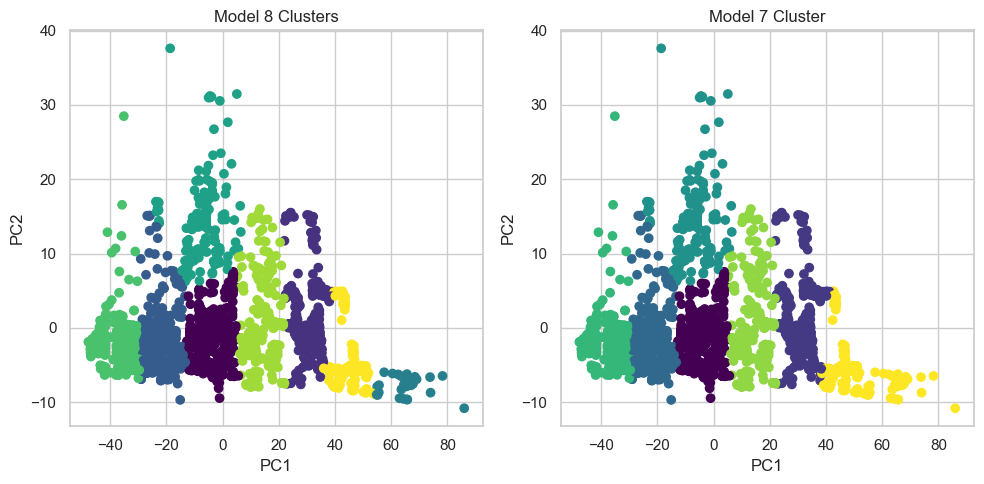

In [156]:
# Creating a 2D matrix
PCA_model = PCA(n_components=2)
#Since the data got changed need to fit and transform the data
PCA_data = PCA_model.fit_transform(X)
# Can change the array to a pandas dataframe
PCA_df = pd.DataFrame(data=PCA_data,columns=["PC1","PC2"])

# Fitting the data in the KMeans model & predicting the outcome of each variable
KMeansModelDefault.fit(PCA_df)
pred_Clus_8 = KMeansModelDefault.predict(PCA_df)
# Fitting the data in the KMeans model & predicting the outcome of each variable
KMeansModel.fit(PCA_df)
pred_Clus_7 = KMeansModel.predict(PCA_df)

# Visualizing the plots of the clusters made by the 2 models.
#PCA_df.plot(x="PC1", y="PC2", kind="scatter", c=pred_Clus_8, cmap="viridis")
#PCA_df.plot(x="PC1", y="PC2", kind="scatter", c=pred_Clus_7, cmap="viridis")

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# plot the first set of data points on the first subplot
ax1.scatter(x=PCA_df["PC1"], y=PCA_df["PC2"], c=pred_Clus_8, cmap="viridis")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_title("Model 8 Clusters")

# plot the second set of data points on the second subplot
ax2.scatter(x=PCA_df["PC1"], y=PCA_df["PC2"], c=pred_Clus_7, cmap="viridis")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_title("Model 7 Cluster")

# adjust spacing between subplots
fig.tight_layout()

# display the plot
plt.show()

The model with 8 clusters makes a distinction for classes at the right side of the graph which is the overweight level type 2. The original dataset did have one common class for the datapoints in the graph. While the model with the better score found it to be more convincing to make a distinction in the 2 classes to have better results from the model and in the dataset. 

Can visualize the labels in another plot using the labels defined in the array and plot them by label in a scatter plot.

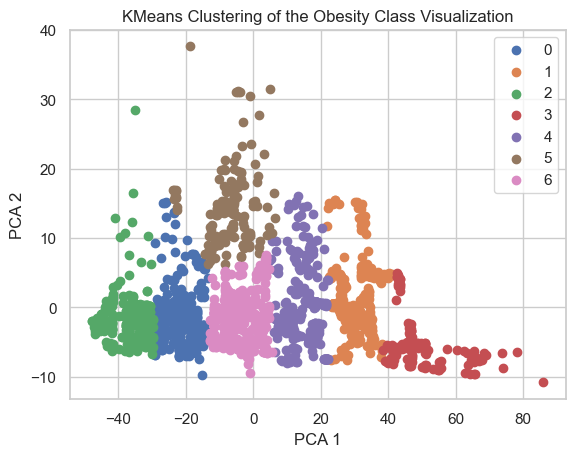

In [157]:
# Getting unique labels
u_labels = np.unique(label)
 
# Plotting the results:
for i in u_labels:
    plt.scatter(PCA_data[label == i , 0] , PCA_data[label == i , 1] , label = i)
plt.title('KMeans Clustering of the Obesity Class Visualization')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

Can see that the results of the 7 clusters are pretty well defined. It can make a great distinction between the different categories. Even though the score is very bad the representation is relatively good. There is a fine border between the different groups/clusters of the dataset. Here class 3 which is the overweight type level 2 is what model with 8 clusters did made an extra distinction in. THe visual representation does make it possible to have a valid distinction between classes.  

Can also check wheter the amount of PCA chosen for the dataset is sufficient enough to get the best results out of the model. It can be doen by plotting the eplaied variance ratio for each PCA togheter with the cumalative sum of EVR to determine the cut off.

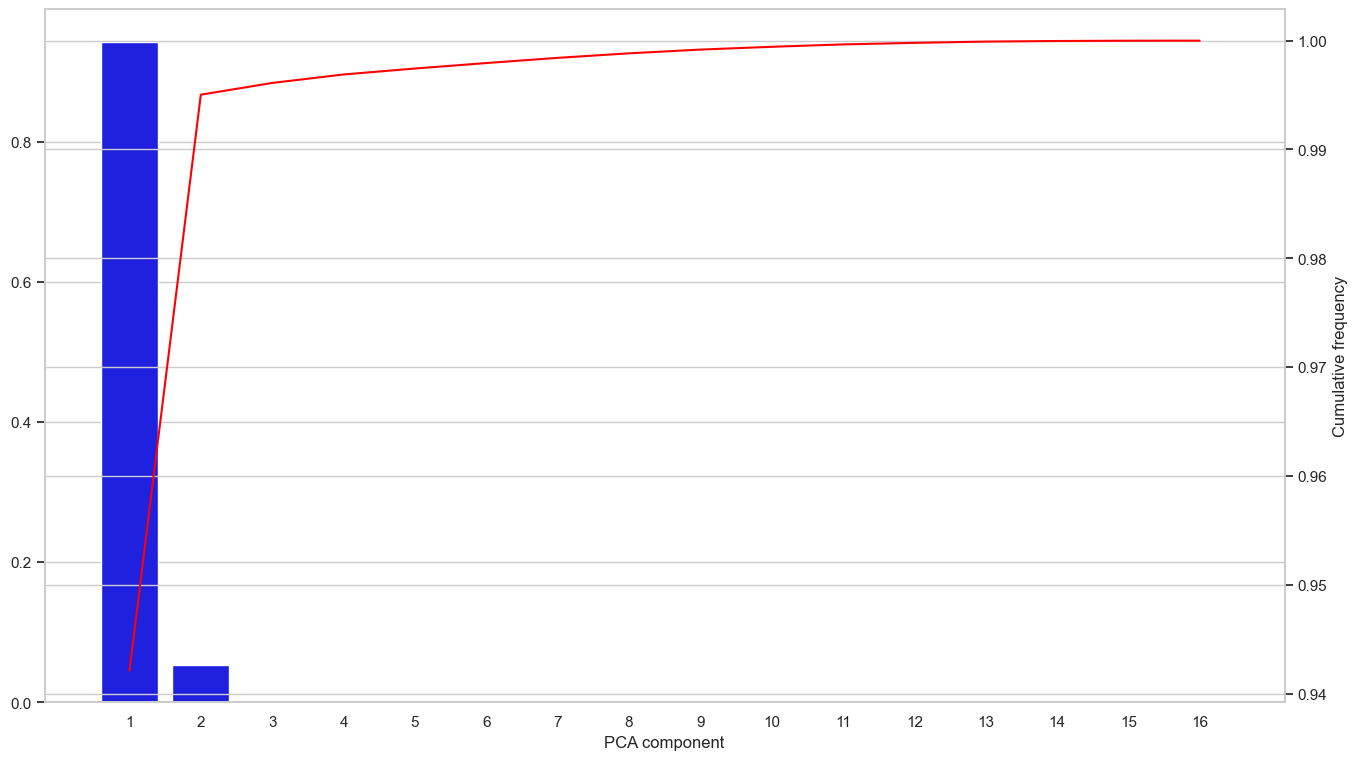

In [158]:
#Create an model that has all the features from the dataset
PCA_model = PCA(n_components=16)
PCA_model.fit(X)

# The sum of the component + all previouse components
PCA_explained_cumulative = np.cumsum(PCA_model.explained_variance_ratio_)
fig = plt.figure(figsize=(16, 9)) 
ax=sns.barplot(x=list(range(1,PCA_model.n_components+1)),y=PCA_model.explained_variance_ratio_,color='blue')
plt.xlabel('PCA component')
ax2=ax.twinx() # dubbele y-as
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Cumulative frequency')
plot=plt.plot(PCA_explained_cumulative, c='red')

The PCA graphs shows that the best possible PCA number of components is indeed 2 based on the cut off from the Cumalative frequency plotted by the red line and varaince for PCA analsis.

### Principal Component Analysis

PCA transforms a number of features to a smaller amount of non-correlated features, also called principal components, whilst preserving as much information as possible. This is dimensionality reduction technique which also has been used in plotting the KMeans. Can use the dimensionality reduction with an Logistic Regression model.

PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [159]:
PCA_model = PCA(n_components = 2)

features_PCA = PCA_model.fit_transform(X)

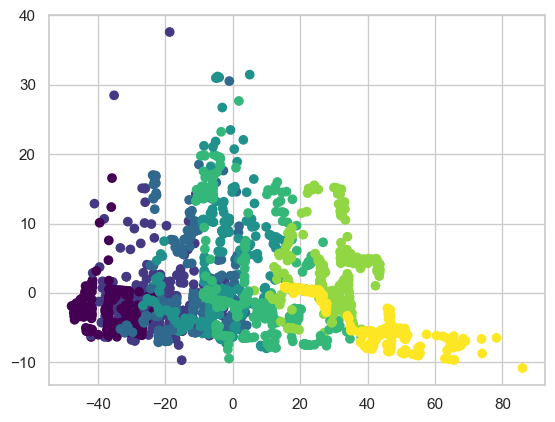

In [160]:
plt.scatter(features_PCA[:,0], features_PCA[:,1], c=dataClus.NObeyesdad, cmap = "viridis")

In [161]:
print("The score of the PCA model: ",PCA_model.score(X))

The score of the PCA model:  -18.33220827708844


PCA is a dimensionality reduction technique used to reduce the number of features in a dataset. The score returned by PCA_model.score(X) is the negative of the sum of squared distances between the data points and their projections onto the principal components. The objective of PCA is to minimize this score by finding the principal components that capture the most variance in the data. The score is a measure of how well the data points are represented by the principal components. A lower score indicates better representation.

The score of -18.33220827708844 indicates that the data points are well represented by the principal components espacially compared to Kmeans clustering.

In [162]:
X_train, X_test, y_train, y_test = train_test_split(features_PCA, dataClus.NObeyesdad, test_size=0.33)
# Added a max_iter to remove the warning message of convergence.
LRmodel=LogisticRegression(class_weight="balanced", max_iter=600)
LRmodel.fit(X_train, y_train)
print("The score of the Linear model using PCA data: ",LRmodel.score(X_train, y_train))                           

The score of the Linear model using PCA data:  0.5205091937765205


When plotting the results on Linear Regression model the score is 0.53 which is very low. Thus scoring bad on the model using PCA data & features. This indicates that using PCA makes the data much worse then instead using no PCA. This is also due to the Model will predict the results based on the results of 2 features combined from the whole dataset. Using the LogisticRegression model can visualize the results in classification report how it was devided. 

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        89
           1       0.53      0.52      0.52        95
           2       0.47      0.42      0.44        93
           3       0.35      0.39      0.37        80
           4       0.42      0.37      0.39       124
           5       0.48      0.60      0.54       101
           6       0.54      0.44      0.49       115

    accuracy                           0.51       697
   macro avg       0.50      0.51      0.50       697
weighted avg       0.50      0.51      0.50       697



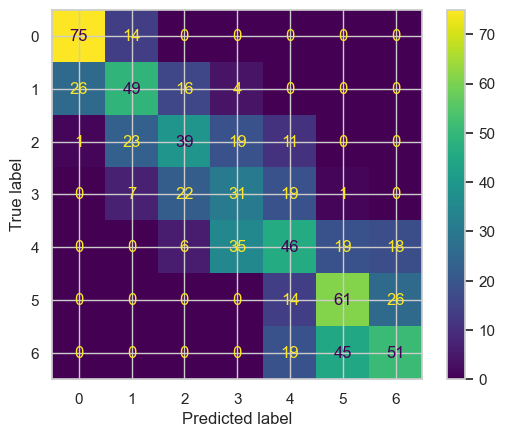

In [163]:
# Predicting the results of test set onto the model
y_pred = LRmodel.predict(X_test)
# Print classsification matrix
print(classification_report(y_test,y_pred))
# Display the confusion matrix
cf_test = confusion_matrix(y_test,y_pred)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()

Having a precision, F1-score, accuracy of 0.5 and a recall of 0.51 shows that the model performs very poorly. When looking at the matrix display can see that there is a lot of data wrongly predicted upt ot half of the data. This shows that the classification does not perform well using this data combined with a PCA model. 

### Spectral Clustering

The last clustering that will be performed is a new one being Spectral classification. Will visualize the results and see if the model can be used for this dataset. 

SpectralClustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#r5f6cbeb1558e-1

Copy the dataset

In [164]:
dataSpectral = data.copy()

Only need a set with the features since clustering the labels are not used, the model will determine the clusters.

In [165]:
X=dataSpectral.drop("NObeyesdad",axis=1) 

Using a dimensionality reduction on the dataset to have a faster result while having less features that will be used and still keep as much info as possible. Parsing the array from PCA to a dataframe. 

Create 2 models to compare. One being without any hyperparams but only the number of clusters that are present in the dataset will be geiven. The other model has some hyperparameter tuning such as an different eigen_solver strategy as an way to assign labels after the Laplacian embedding. Comparing the results in a graph since the score can not be asked. 

In [166]:
# Creating a 2D matrix
PCA_model = PCA(n_components=2)
#Since the data got changed need to fit and transform the data
PCA_data = PCA_model.fit_transform(X)
# Can change the array to a pandas dataframe
PCA_df = pd.DataFrame(data=PCA_data,columns=["PC1","PC2"])

SpectralModel_Tuned = SpectralClustering(n_clusters= 7,
                                  eigen_solver= 'arpack',
                                  random_state= 24,
                                  assign_labels= 'discretize')

SpectralModel_Basic = SpectralClustering(n_clusters=7)

In [167]:
# Fitting the data in the model
SpectralModel_Basic.fit(PCA_df)

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(


SpectralClustering(n_clusters=7)

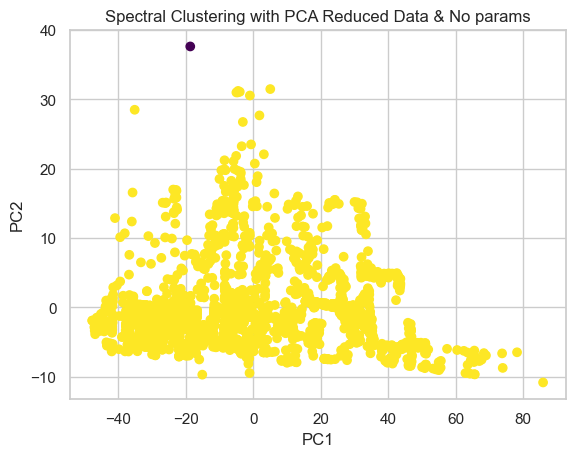

In [168]:
plt.scatter(x=PCA_df["PC1"], y=PCA_df["PC2"], c=SpectralModel_Basic.labels_, cmap='viridis')
plt.title("Spectral Clustering with PCA Reduced Data & No params")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The grap shows that there is pracically no distinction in clusters. This indicates that without any params the model can not be used since it has no real representation of teh clusters from the dataset. This also not having somewhat similar results as previous clustering technique.

Can cluster with hyperparams added to the graph.

In [169]:
# Fitting the data in the model
SpectralModel_Tuned.fit(PCA_df)

SpectralClustering(assign_labels='discretize', eigen_solver='arpack',
                   n_clusters=7, random_state=24)

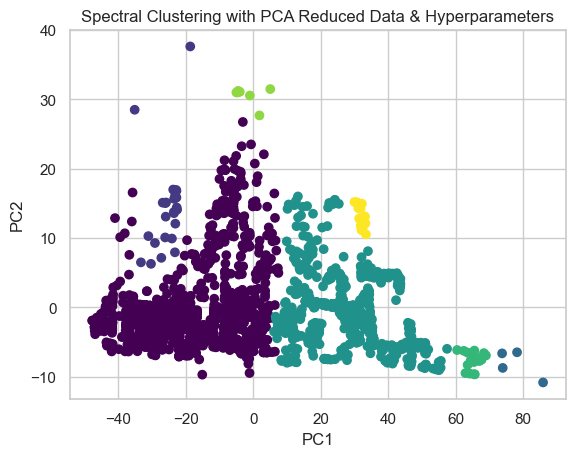

In [170]:
plt.scatter(x=PCA_df["PC1"], y=PCA_df["PC2"], c=SpectralModel_Tuned.labels_, cmap='viridis')
plt.title("Spectral Clustering with PCA Reduced Data & Hyperparameters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

With hyperparams added there is what more distinct in classes having 6 classes recognized. Stilll there are 7 classes and de distinction between classes is somewhat random having clusters that are somewhat split by another cluster. 

The models can indicate either there has to be more tuning done to have a functionally representative model. But it can be that these representations can not visualize the results in the correct dimensions and thus needing other visualization techniques for the model to have a concrete conclusion about the results. 

### PCA integration into workflow

In [171]:
dataPipe = data.copy()

In [172]:
X = dataPipe.drop("NObeyesdad", axis = 1)
y = dataPipe.NObeyesdad

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [174]:
from sklearn.pipeline import Pipeline

# Create a pipeline that 
pipe = Pipeline([('PCA', PCA(n_components = 2)),
                ('LogMod', LogisticRegression(class_weight="balanced", max_iter=600))])

# Fit the model on the training set, and print the score of the test set
pipe.fit(X_train, y_train)

print(f" Score of the train model: {pipe.score(X_train, y_train)}")

 Score of the train model: 0.512022630834512


## Part 7: conclusion


The first model performed was linear regression. The results from linear regression were overall very good with a score of 0.94 for training set and 0.95 for the test set. The results show that the models can almost correctly predict what the outcome is of each feature. 

The RandomForestRegression is another regression technique where multiple models where tested with different hyperparameters. The standard model could already predict up to 99 % of the results correctly. Using different parameters as ‘n_estimators’, ‘criterion’, ‘max_depth’ to see if any can have an effect to perform better model. What was noticeably that ‘max_depth had the most effect on the results of a model.  The more the ‘max_depth’ increased of the tree the better the results were performed. This could be more finetuned in the future for this dataset. Having with a ‘max_depth’ of 0.99 for the train model and 0.97 score for the test model, having almost the same results as the basic model. 

On this dataset different scalers were performed such as MinMax scaler, Standard scaler and Robust scaler. The scalers all performed the same having a 0.9923 score for the training model and a 0.979 score for the test model score. 

Using the Ridge and Lasso regression to prevent overfitting of the model were performed as well. When both increasing the alpha value thus stronger the regularization and thus the more coefficients will be shrunk towards zero. When increasing the alpha value for both models results in a worse model. Having scores for model around 0.9. When using a very small alpha value thus almost no regularization had a very good score in the model. Small values almost having no regularization were the best results for the model instead of having a higher alpha value. 

Performing LogisticRegression which is a classification technique was performed with standard model on the dataset. Here the train score was 0.88 and the test score was 0.86. Can see that classification technique here is performing slightly worse then linear regression. But still results are not that bad the Confusion matrix showed that a lot of samples were correctly classified and if they are wrongly predicted they are shifted one class up or down. When performing a grid search to find the optimal parameters for the LogisticRegression in a very fast and efficient way. The best parameters resulted in a model with a score of 0.96 which is a high increase compared to the basic model of LogisticRegression. The params were: 'C': 3.25, 'class_weight': 'balanced', 'multi_class': 'auto','penalty': 'l1', 'solver': 'saga'. 

Also tried classification based on the NaiveBayes classification. The score for the training model was 0.59 and the score for the test model was 0.6. These are very bad results almost up to half of the predictions being wrong for the model. Tried to scale and then see if it was possible to improve any results but the scores were even worse having 0.41 for the training model and 0.43 for the test model. 

Using the DecisionTreeClassifier with default settings already resulted in a score for the training model of 1 and a score for the test model of 0.91. These are very good results but what concerns me is the big difference between the test and training model with the test model underperforming quite a bit, even though the score is still relatively high. 

At last for classification, stacking was performed using LogisticRegression, NaiveBayes and DecisionTreeClassifier. With some settings that LogisticRegression performed best with. The results of the training model were quite high having a 0.998 score and a 0.91 score for the test model. The results are not really an improvement from using DecisoinTreeClassifier separately which may indaicate that stacking is not sufficient using the models together. Maybe it is possible to get better result having other models included or used to gain a perfect score. 

Clustering firstly compared the KMeans having either scaled and unscaled values to determine the number of clusters the model has. When scaling the model could not make a good distinction how many clusters were present using the Elbow method. The unscaled data showed that the Elbow method could have either 7 or 8 clusters which can look in to. 
Trying to have a KMeans model using a different algorithm and predetermined clusters and a KMeans model having no predetermined clusters, showed that the KMeans model without predetermined clusters performed better then already determining how many clusters there are. When plotting the clusters can have a great visualization that the model without any clusters makes an extra distinction in groups for the overweight level type 2. 

Determining the cut-off for PCA based on the explained variance and the cumulative sum of EVR the best PCA value is 2.  Tried to use PCA with a LogisticRegression model but the results were quite bad up to predicting half of the data wrong. 

Trying Spectral clustering on the model  to see if that clustering technique could make a good distinction in classes. The basic model did not succeed to determine any of the clusters, showing only one big cluster. When using some hyperparams there was a better model performed having some clusters identified but still the visualization was not representative of the real data. This could either be due to a bad clustering technique for the data of not a good visualization technique for the results of the data. 

Overall this was a really good dataset to perform all different techniques on. The best were Linear regression and Forest regression and some of the Classification techniques. Decision tree as Logistic regression with hyperparams performed very well. But even still the KMeans for clustering performed very well that even may conclude to make a distinction in the overweight type 2 class. The Spectral clustering on the other hand did not perform well. 

Maybe in the future I would redo the Linear and Regression techniques but add an extra class or feature based of clustering dsiticntion in overweight type 2 to see if it does improve the models so it can predict the scores even much better then it already has. 

In practical context I think it is a very good dataset to predict on the features in whether which class a person belongs to. In reality the BMI score and other techniques are used to classify persons health but the features of this model can be used as a validation technique. Maybe can see some improvements or practical use of the dataset. 
